In [1]:
#CONNECT TO DRIVE

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#read the file

import numpy as np
import pandas as pd

import seaborn as sns #MATPLOTLIB
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats

df = pd.read_csv('/content/drive/MyDrive/CSE 303/project/UPDATED-TRAIN (1).csv')
print(df)

print(df.head())

      Gender  Height (cm)  Weight (kg) Blood Pressure (s/d)  \
0       Male   171.148359    86.185197              151/109   
1       Male   172.946206    79.641937              134/112   
2     Female   155.945488    49.167058              160/101   
3     Female   169.078298    56.017921               133/94   
4     Female   163.758355    73.966304              170/106   
...      ...          ...          ...                  ...   
2995    Male   161.632502    88.323405               134/91   
2996    Male   163.443512    93.217007               110/78   
2997    Male          NaN    86.258847              159/116   
2998  Female          NaN    41.371018               134/82   
2999    Male   175.341710    78.718038               167/91   

      Cholesterol Level (mg/dL)        BMI  Blood Glucose Level (mg/dL)  \
0                    259.465814  29.423017                   157.652848   
1                    263.630292  26.626847                   118.507805   
2                 

In [4]:
#checking if there is any null value

df.isnull().sum()

,0
Gender,0
Height (cm),29
Weight (kg),0
Blood Pressure (s/d),0
Cholesterol Level (mg/dL),0
BMI,34
Blood Glucose Level (mg/dL),33
Bone Density (g/cm²),41
Vision Sharpness,40
Hearing Ability (dB),59


<Axes: >

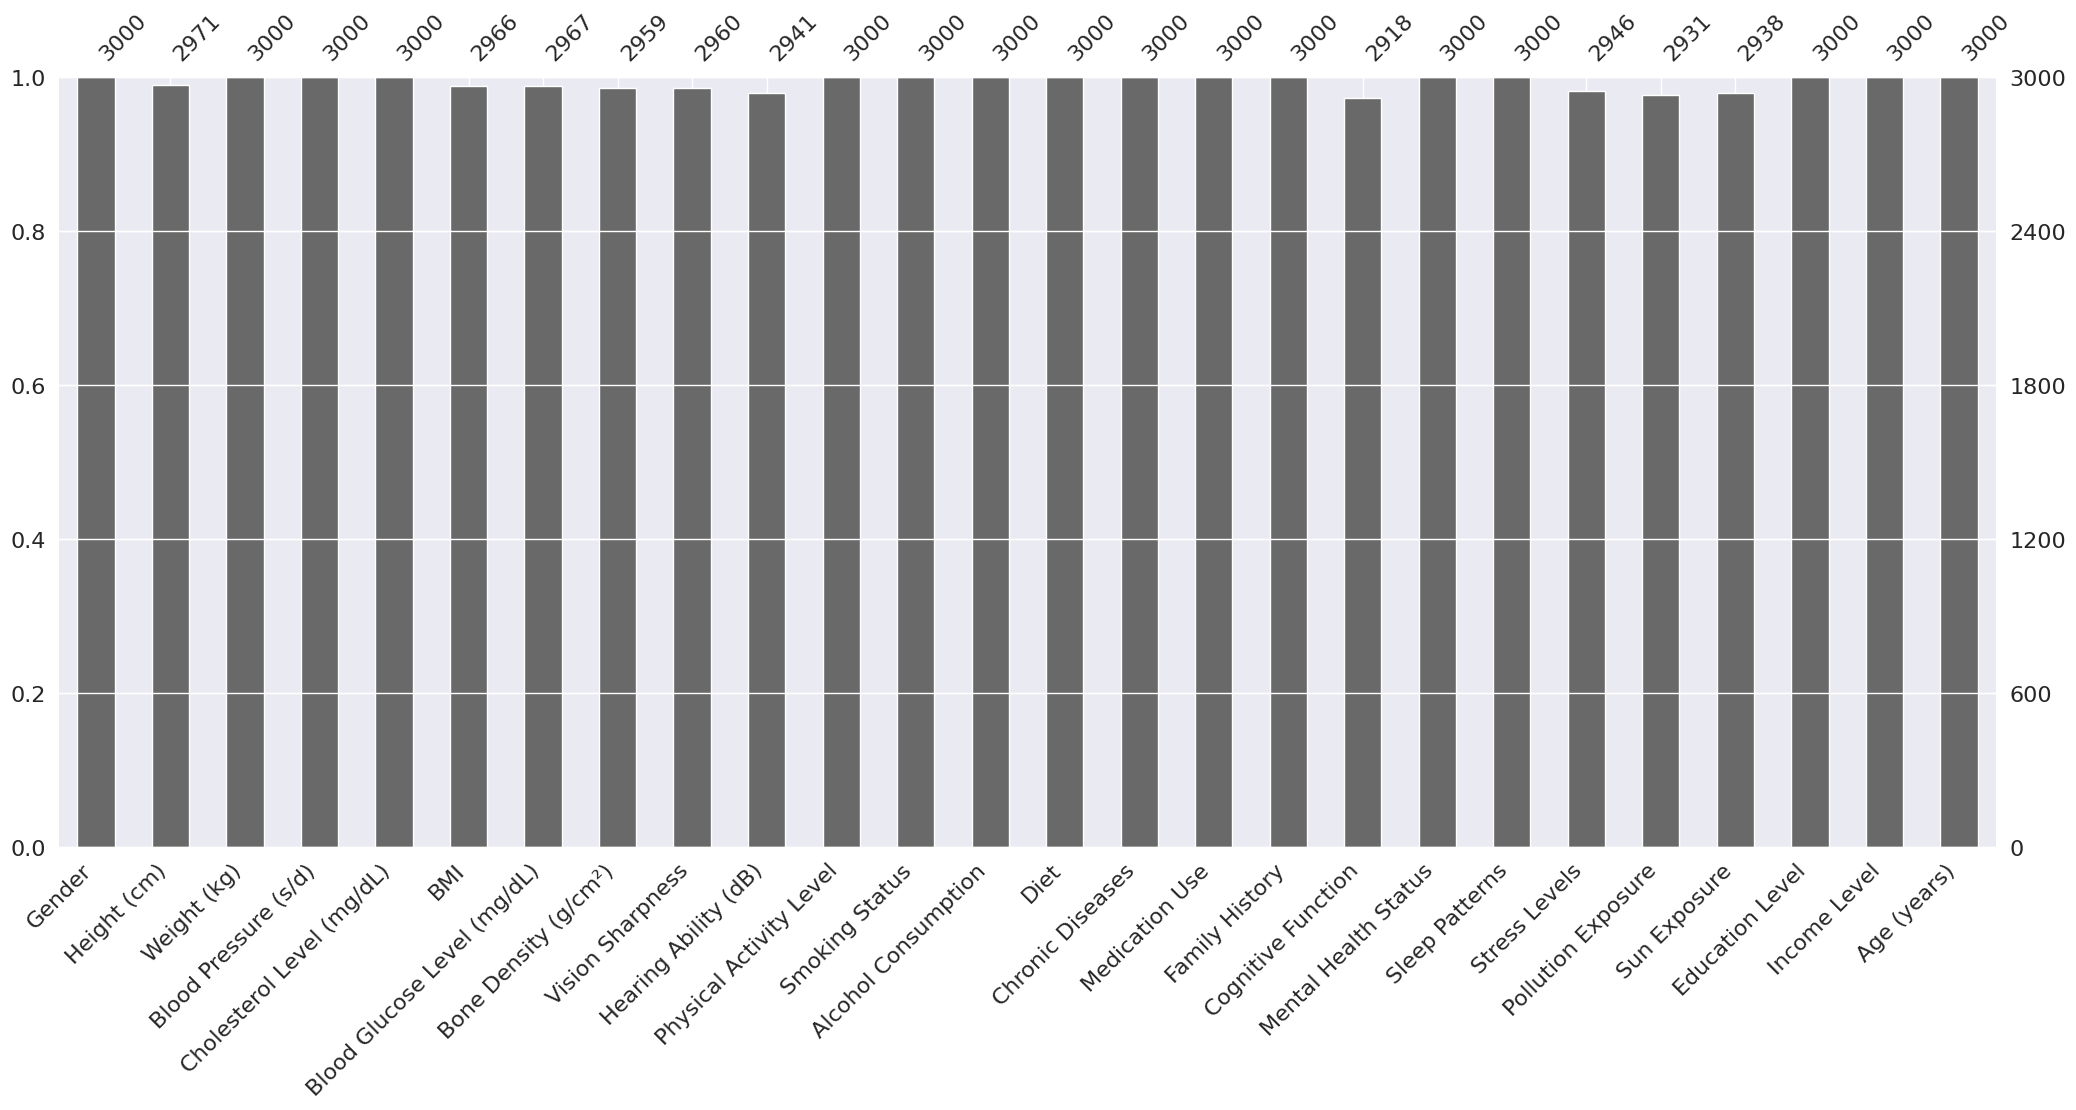

In [5]:
#BAR CHAR TO SEE THE MISSING VALUES
import missingno as msno
msno.bar(df)

In [6]:
# description of the data with null values

df.describe()

,Height (cm),Weight (kg),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Cognitive Function,Stress Levels,Pollution Exposure,Sun Exposure,Age (years)
count,2971.000000,3000.000000,3000.000000,2966.000000,2967.000000,2959.000000,2960.000000,2941.000000,2918.000000,2946.000000,2931.000000,2938.000000,3000.000000
mean,168.585212,72.537260,234.029794,25.531359,126.654810,0.931402,0.474077,46.948484,63.844577,5.473553,5.030471,5.975147,53.485667
std,9.264572,13.190734,24.521436,4.361882,18.195703,0.444105,0.209957,14.368234,11.761895,2.586425,2.870328,3.477164,20.569690
min,144.056391,32.537672,148.811513,12.049900,69.866884,-0.219787,0.200000,0.000000,30.382098,1.000428,0.006395,0.002055,18.000000
25%,161.666808,63.222773,216.756601,22.449431,114.400830,0.560193,0.280665,36.680635,55.639148,3.220563,2.606546,2.881231,36.000000
50%,168.204068,71.448651,234.376822,25.343342,126.803681,0.937534,0.461668,46.879037,63.950619,5.494904,5.096544,5.984166,53.000000
75%,175.440111,81.702801,250.646674,28.371327,139.396158,1.294919,0.638839,56.765058,72.101951,7.680110,7.483116,9.046870,72.000000
max,198.112215,123.598603,331.300589,43.329869,185.736144,1.999829,1.062537,94.003824,106.479831,9.996323,9.998090,11.992504,89.000000


In [7]:
#checking outlier in Height


def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

outliers = find_outliers_IQR(df['Height (cm)'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

number of outliers: 1
max outlier value: 198.1122151
min outlier value: 198.1122151


In [8]:
#checking outlier in BMI


def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

outliers = find_outliers_IQR(df['BMI'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

number of outliers: 16
max outlier value: 43.32986946
min outlier value: 12.04989979


In [9]:
#checking outlier in Cholesterol Level (mg/dL)


def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

outliers = find_outliers_IQR(df['Cholesterol Level (mg/dL)'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

number of outliers: 19
max outlier value: 331.300589
min outlier value: 148.8115135


In [10]:
#checking outlier in Blood Glucose Level (mg/dL)


def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

outliers = find_outliers_IQR(df['Blood Glucose Level (mg/dL)'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

number of outliers: 13
max outlier value: 185.7361443
min outlier value: 69.86688424


In [11]:
#checking outlier in Bone Density (g/cm²)


def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

outliers = find_outliers_IQR(df['Bone Density (g/cm²)'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

number of outliers: 0
max outlier value: nan
min outlier value: nan


In [12]:
#checking outlier in Vision Sharpness


def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

outliers = find_outliers_IQR(df['Vision Sharpness'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

number of outliers: 0
max outlier value: nan
min outlier value: nan


In [13]:
#checking outlier in Hearing Ability (dB)


def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

outliers = find_outliers_IQR(df['Hearing Ability (dB)'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

number of outliers: 9
max outlier value: 94.00382428
min outlier value: 0.0


In [14]:

#checking outlier in Cognitive Function


def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

outliers = find_outliers_IQR(df['Cognitive Function'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

number of outliers: 11
max outlier value: 106.4798308
min outlier value: 30.3820982


In [15]:

#checking outlier in Stress Levels


def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

outliers = find_outliers_IQR(df['Stress Levels'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

number of outliers: 0
max outlier value: nan
min outlier value: nan


In [16]:

#checking outlier in Pollution Exposure


def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

outliers = find_outliers_IQR(df['Pollution Exposure'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

number of outliers: 0
max outlier value: nan
min outlier value: nan


In [17]:

#checking outlier in Sun Exposure


def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

outliers = find_outliers_IQR(df['Sun Exposure'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

number of outliers: 0
max outlier value: nan
min outlier value: nan


In [18]:
# description of the data with null values

df.describe()

,Height (cm),Weight (kg),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Cognitive Function,Stress Levels,Pollution Exposure,Sun Exposure,Age (years)
count,2971.000000,3000.000000,3000.000000,2966.000000,2967.000000,2959.000000,2960.000000,2941.000000,2918.000000,2946.000000,2931.000000,2938.000000,3000.000000
mean,168.585212,72.537260,234.029794,25.531359,126.654810,0.931402,0.474077,46.948484,63.844577,5.473553,5.030471,5.975147,53.485667
std,9.264572,13.190734,24.521436,4.361882,18.195703,0.444105,0.209957,14.368234,11.761895,2.586425,2.870328,3.477164,20.569690
min,144.056391,32.537672,148.811513,12.049900,69.866884,-0.219787,0.200000,0.000000,30.382098,1.000428,0.006395,0.002055,18.000000
25%,161.666808,63.222773,216.756601,22.449431,114.400830,0.560193,0.280665,36.680635,55.639148,3.220563,2.606546,2.881231,36.000000
50%,168.204068,71.448651,234.376822,25.343342,126.803681,0.937534,0.461668,46.879037,63.950619,5.494904,5.096544,5.984166,53.000000
75%,175.440111,81.702801,250.646674,28.371327,139.396158,1.294919,0.638839,56.765058,72.101951,7.680110,7.483116,9.046870,72.000000
max,198.112215,123.598603,331.300589,43.329869,185.736144,1.999829,1.062537,94.003824,106.479831,9.996323,9.998090,11.992504,89.000000


In [19]:
med1_val = df['Height (cm)'].mean()

#replacing null with median value
df['Height (cm)'] = df['Height (cm)'].fillna(med1_val)


med2_val = df['BMI'].median()

#replacing null with median value
df['BMI'] = df['BMI'].fillna(med2_val)


med3_val = df['Blood Glucose Level (mg/dL)'].median()

#replacing null with median value
df['Blood Glucose Level (mg/dL)'] = df['Blood Glucose Level (mg/dL)'].fillna(med3_val)


med4_val = df['Bone Density (g/cm²)'].mean()

#replacing null with median value
df['Bone Density (g/cm²)'] = df['Bone Density (g/cm²)'].fillna(med4_val)


med5_val = df['Vision Sharpness'].mean()

#replacing null with median value
df['Vision Sharpness'] = df['Vision Sharpness'].fillna(med5_val)


med6_val = df['Hearing Ability (dB)'].median()

#replacing null with median value
df['Hearing Ability (dB)'] = df['Hearing Ability (dB)'].fillna(med6_val)


med7_val = df['Cognitive Function'].median()

#replacing null with median value
df['Cognitive Function'] = df['Cognitive Function'].fillna(med7_val)


med8_val = df['Stress Levels'].mean()

#replacing null with median value
df['Stress Levels'] = df['Stress Levels'].fillna(med8_val)


med9_val = df['Pollution Exposure'].mean()

#replacing null with median value
df['Pollution Exposure'] = df['Pollution Exposure'].fillna(med9_val)


med10_val = df['Sun Exposure'].mean()

#replacing null with median value
df['Sun Exposure'] = df['Sun Exposure'].fillna(med10_val)
df.isnull().sum()










,0
Gender,0
Height (cm),0
Weight (kg),0
Blood Pressure (s/d),0
Cholesterol Level (mg/dL),0
BMI,0
Blood Glucose Level (mg/dL),0
Bone Density (g/cm²),0
Vision Sharpness,0
Hearing Ability (dB),0


<Axes: >

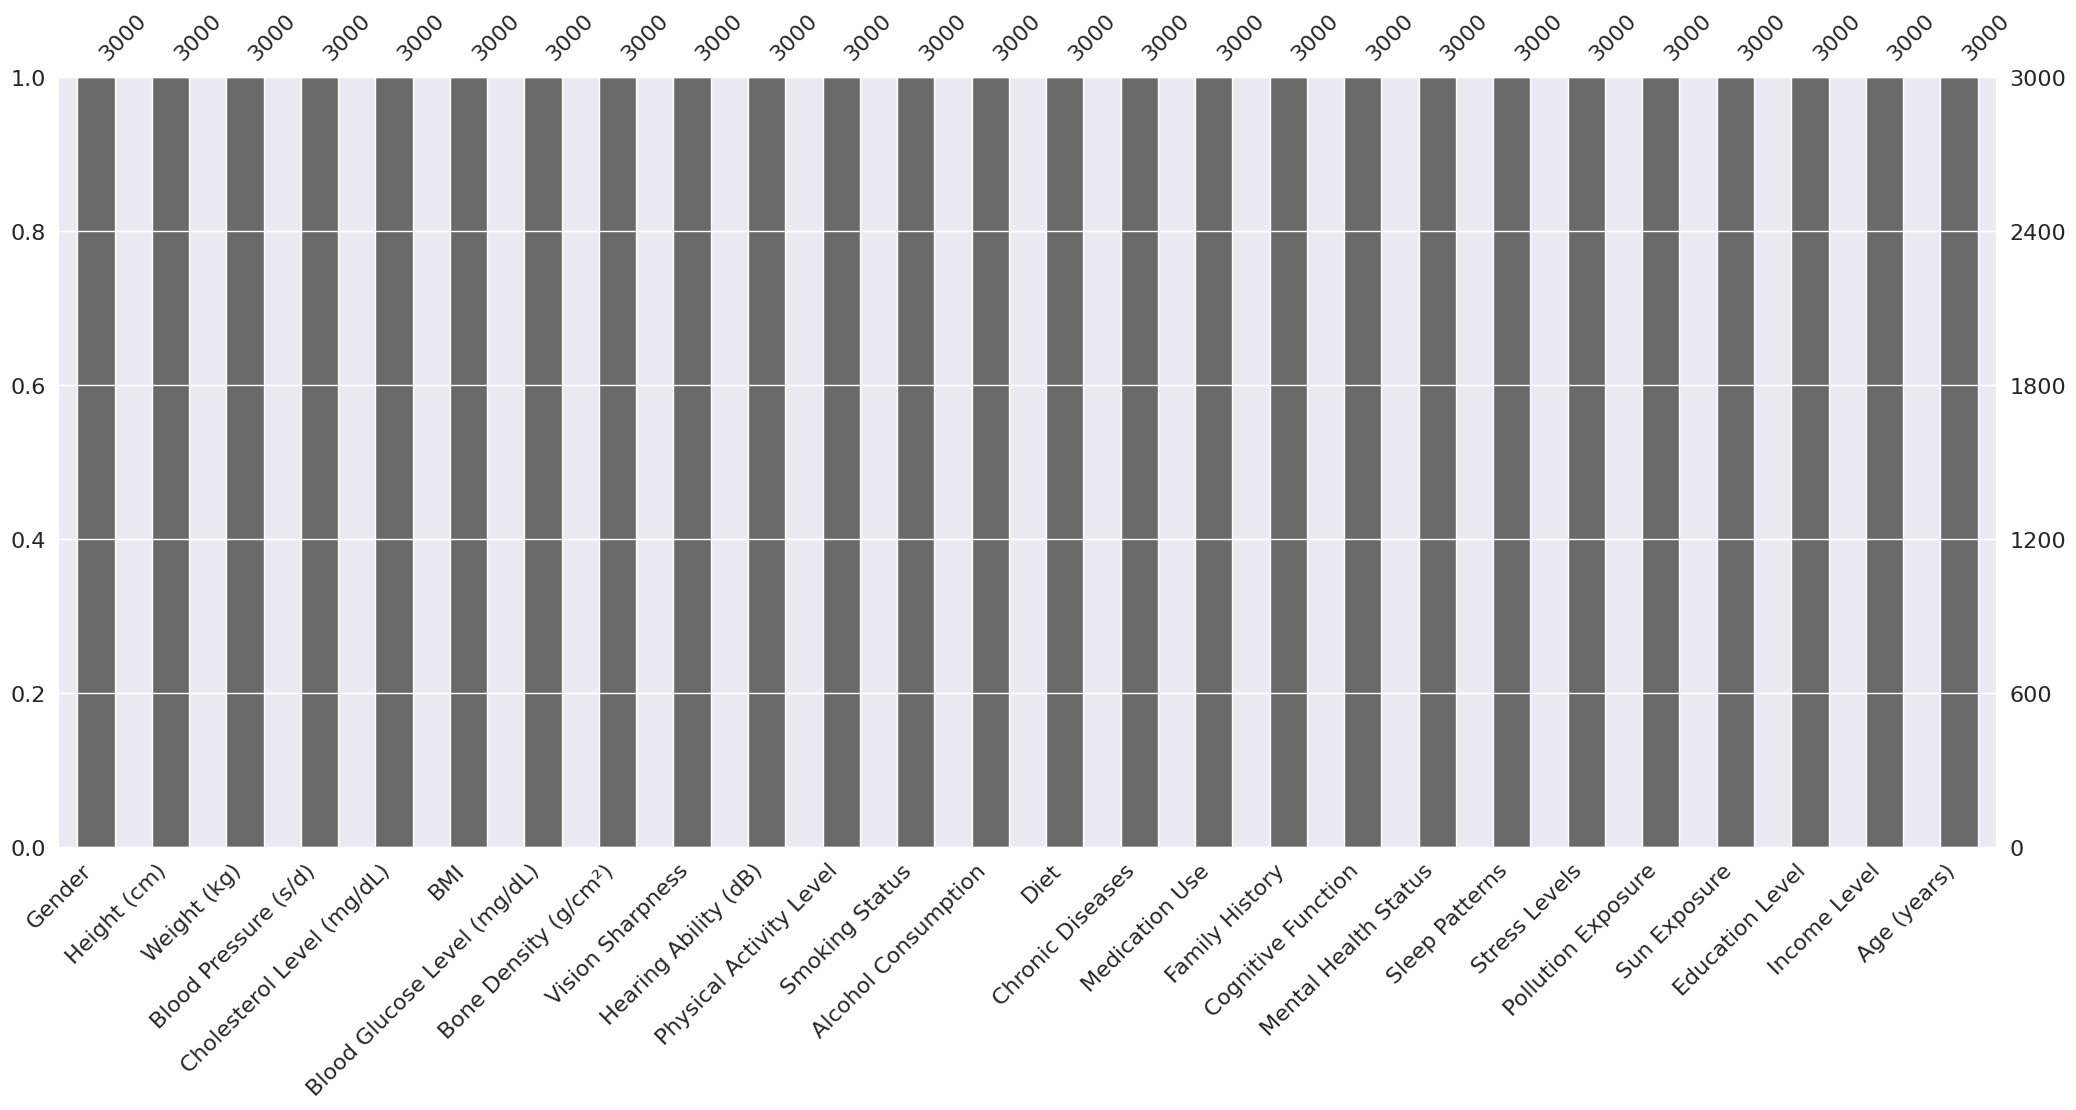

In [20]:
# Visualisation

import missingno as msno
msno.bar(df)

In [21]:
# Check data types of all columns
df_correlation = df.copy()
print(df_correlation.dtypes)

Gender                          object
Height (cm)                    float64
Weight (kg)                    float64
Blood Pressure (s/d)            object
Cholesterol Level (mg/dL)      float64
BMI                            float64
Blood Glucose Level (mg/dL)    float64
Bone Density (g/cm²)           float64
Vision Sharpness               float64
Hearing Ability (dB)           float64
Physical Activity Level         object
Smoking Status                  object
Alcohol Consumption             object
Diet                            object
Chronic Diseases                object
Medication Use                  object
Family History                  object
Cognitive Function             float64
Mental Health Status            object
Sleep Patterns                  object
Stress Levels                  float64
Pollution Exposure             float64
Sun Exposure                   float64
Education Level                 object
Income Level                    object
Age (years)              

In [22]:
duplicate = df[df.duplicated()]
duplicate

,Gender,Height (cm),Weight (kg),Blood Pressure (s/d),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),...,Family History,Cognitive Function,Mental Health Status,Sleep Patterns,Stress Levels,Pollution Exposure,Sun Exposure,Education Level,Income Level,Age (years)


In [23]:
physical_act ={

        'Low':0,
        'Moderate':1,
        'High':2,

}
df['physical_act']=df['Physical Activity Level'].map(physical_act)

smoking_map ={

        'Never':0,
        'Former':1,
        'Current':2
}
df['smoking_map']=df['Smoking Status'].map(smoking_map)

alcohol_map ={

        'No':0,
        'Occasional':1,
        'Frequent':2
}
df['alcohol_map']=df['Alcohol Consumption'].map(alcohol_map)

Diet_map ={
        'Balanced':0,
        'High-fat':1,
        'Low-carb':2,
        'Vegetarian':3
}
df['Diet_map']=df['Diet'].map(Diet_map)

Gender_map ={
        'Male':0,
        'Female':1
}
df['Gender_map']=df['Gender'].map(Gender_map)

Chronic_map ={
        'No':0,
        'Hypertension':1,
        'Diabetes':2,
        'Heart Disease':3
}
df['Chronic_map']=df['Chronic Diseases'].map(Chronic_map)

Medication_map ={
        'No':0,
        'Regular':1,
        'Occasional':2
}
df['Medication_map']=df['Medication Use'].map(Medication_map)

History_map ={
        'No':0,
        'Hypertension':1,
        'Diabetes':2,
        'Heart Disease':3
}
df['History_map']=df['Family History'].map(History_map)

Mental_Health_map ={
        'Poor':0,
        'Good':2,
        'Fair':1,
        'Excellent':3
}
df['Mental_Health_map']=df['Mental Health Status'].map(Mental_Health_map)

Sleeping_map={
        'Normal':0,
        'Insomnia':1,
        'Excessive':2
}
df['Sleeping_map']=df['Sleep Patterns'].map(Sleeping_map)

Education_Level_map={
        'No':0,
        'High School':1,
        'Undergraduate':2,
        'Postgraduate':3
}
df['Education_Level_map']=df['Education Level'].map(Education_Level_map)


Income_Level_map={
        'Low':0,
        'Medium':1,
        'High':2
}
df['Income_Level_map']=df['Income Level'].map(Income_Level_map)


df.head()

,Gender,Height (cm),Weight (kg),Blood Pressure (s/d),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),...,alcohol_map,Diet_map,Gender_map,Chronic_map,Medication_map,History_map,Mental_Health_map,Sleeping_map,Education_Level_map,Income_Level_map
0,Male,171.148359,86.185197,151/109,259.465814,29.423017,157.652848,0.132868,0.200000,58.786198,...,0,2,0,0,0,0,2,1,0,1
1,Male,172.946206,79.641937,134/112,263.630292,26.626847,118.507805,0.629534,0.267312,54.635270,...,1,0,0,1,0,3,2,0,2,1
2,Female,155.945488,49.167058,160/101,207.846206,20.217553,143.587550,0.473487,0.248667,54.564632,...,0,0,1,1,1,1,0,1,0,1
3,Female,169.078298,56.017921,133/94,253.283779,19.595270,137.448581,1.184315,0.513818,79.722963,...,0,0,1,2,2,1,0,1,0,0
4,Female,163.758355,73.966304,170/106,236.119899,27.582078,145.328695,0.434562,0.474077,52.479469,...,2,3,1,0,0,0,2,0,2,2


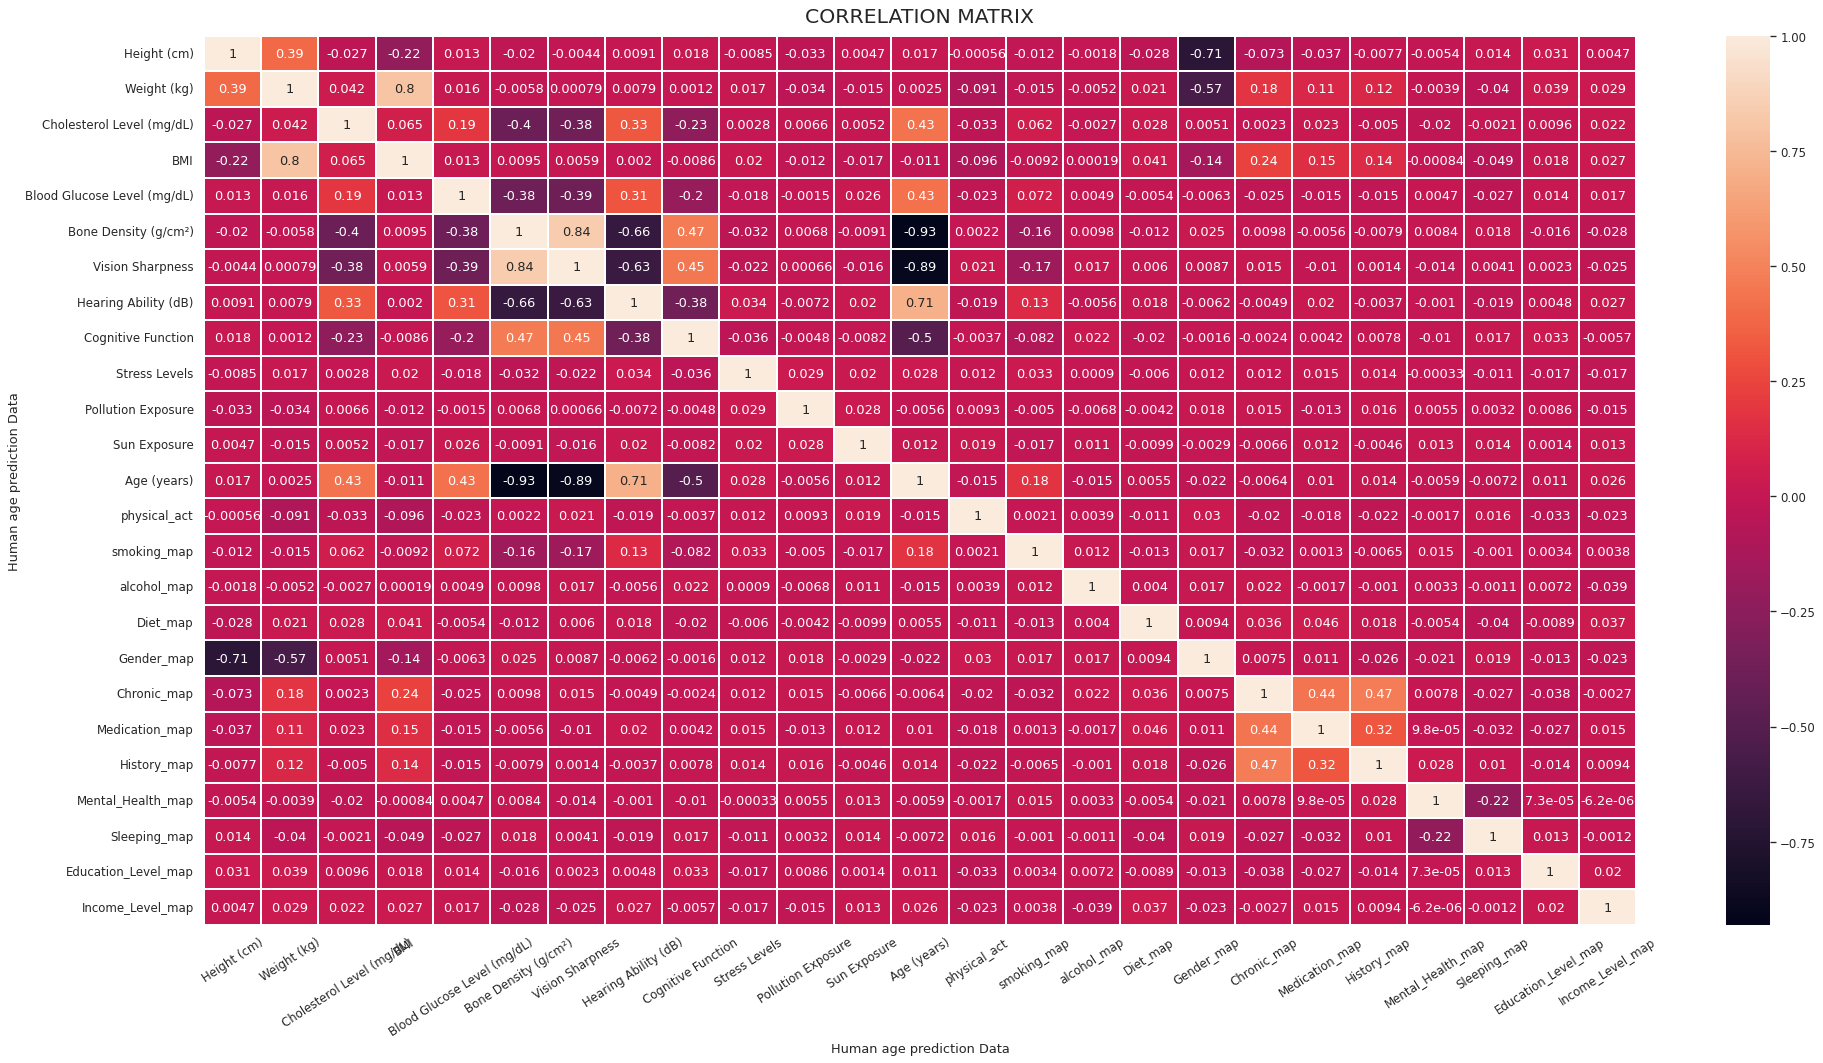

In [24]:
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats
df_c = df.copy()
df_c.drop(columns=['Gender','Blood Pressure (s/d)','Physical Activity Level','Smoking Status','Alcohol Consumption','Diet','Chronic Diseases','Medication Use','Family History','Mental Health Status','Sleep Patterns','Education Level','Income Level'],inplace=True)
correlation = df_c.corr()

plt.figure(figsize=(30,15), dpi=77)
sns.heatmap(correlation, linecolor='white',linewidths=0.1, annot=True)
plt.title('Correlation Matrix'.upper(), size=19, pad=13)
plt.xlabel('Human age prediction Data')
plt.ylabel('Human age prediction Data')
plt.xticks(rotation=33)
plt.show()

from this correlation matrix, it’s clear that every features are correlated to each other either strongly positive correlation or strongly negative correlation or weakly positive or negative. The main thing is the target variable which is age is highly correlated with hearing ability, blood glucose level and cholesterol level. It also has strongly negative correlation with bone density, vision sharpness. Smoking_map also has much effect on age as well. Other features have a little effect on age features.

In [25]:
X = df_c.drop(['Age (years)'], axis = 1)
y = df_c[['Age (years)']]

print(X)
print(y)

      Height (cm)  Weight (kg)  Cholesterol Level (mg/dL)        BMI  \
0      171.148359    86.185197                 259.465814  29.423017   
1      172.946206    79.641937                 263.630292  26.626847   
2      155.945488    49.167058                 207.846206  20.217553   
3      169.078298    56.017921                 253.283779  19.595270   
4      163.758355    73.966304                 236.119899  27.582078   
...           ...          ...                        ...        ...   
2995   161.632502    88.323405                 204.175510  33.807917   
2996   163.443512    93.217007                 197.384424  34.894725   
2997   168.585212    86.258847                 238.641541  27.268332   
2998   168.585212    41.371018                 198.244328  25.343342   
2999   175.341710    78.718038                 279.118184  25.603762   

      Blood Glucose Level (mg/dL)  Bone Density (g/cm²)  Vision Sharpness  \
0                      157.652848              0.132868   

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 0)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

      Height (cm)  Weight (kg)  Cholesterol Level (mg/dL)        BMI  \
1732   167.908831    74.340585                 256.259366  26.368104   
2440   170.016624    79.077178                 214.346407  27.356995   
1232   177.231189    69.278743                 237.512564  22.055642   
1081   156.379388    81.980097                 272.263290  33.523504   
2920   150.634150    65.424190                 245.355293  28.833109   
...           ...          ...                        ...        ...   
763    164.070517    55.680089                 224.394114  20.684205   
835    163.717669    83.044490                 264.444897  30.982732   
1653   158.144950    62.277359                 254.170673  24.901157   
2607   179.624331    83.472725                 256.323809  25.871063   
2732   180.248592    81.449822                 205.424509  25.069541   

      Blood Glucose Level (mg/dL)  Bone Density (g/cm²)  Vision Sharpness  \
1732                   132.296985              1.121349   

In [27]:
from sklearn.linear_model import LinearRegression
r= LinearRegression()
r.fit(X_train,y_train)

LinearRegression()

In [28]:
y_predict=r.predict(X_test)
print(y_predict)

[[41.85959225]
 [82.73179325]
 [67.62969721]
 [23.22127091]
 [59.50815766]
 [43.88959962]
 [78.59464928]
 [75.20958323]
 [51.21617538]
 [37.26798304]
 [31.34296796]
 [64.61508147]
 [50.86346034]
 [84.53398513]
 [28.48271513]
 [22.8978397 ]
 [25.18381476]
 [53.41035075]
 [75.6280087 ]
 [55.00161119]
 [33.15720826]
 [55.80431427]
 [34.52945539]
 [77.01552611]
 [60.77659384]
 [15.1944387 ]
 [38.81837487]
 [84.22659112]
 [66.55314867]
 [33.77965824]
 [59.56437166]
 [73.0491497 ]
 [43.57343522]
 [27.97557529]
 [65.29390048]
 [22.17441361]
 [52.33387374]
 [28.03470212]
 [43.69777619]
 [81.79487024]
 [31.98822999]
 [41.02485792]
 [37.65264457]
 [88.27669313]
 [83.66146424]
 [49.74109364]
 [37.85769165]
 [42.65751036]
 [52.24916538]
 [31.63843768]
 [45.06015244]
 [77.13402781]
 [54.86916179]
 [20.93042137]
 [37.86435617]
 [71.55431466]
 [81.96639379]
 [79.70708994]
 [27.14901796]
 [44.08714996]
 [51.51294654]
 [79.84724183]
 [71.83868796]
 [11.78237744]
 [17.72604359]
 [41.37280068]
 [75.22068

In [29]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_predict)

30.713291748605826

In [ ]:
#          JUST CHECKING ..............................................




import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error

# Load your data
# df = pd.read_csv('your_data.csv')
X = df_c.drop(['Age (years)'], axis = 1)
y = df_c[['Age (years)']]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Try Polynomial Features
poly = PolynomialFeatures(degree=2)  # Experiment with different degrees
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Train Linear Regression
model = LinearRegression()
model.fit(X_train_poly, y_train)
y_predict = model.predict(X_test_poly)

# Calculate MSE
mse = mean_squared_error(y_test, y_predict)
print(f'Mean Squared Error: {mse}')

# Try Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_poly, y_train)
y_predict_ridge = ridge_model.predict(X_test_poly)
mse_ridge = mean_squared_error(y_test, y_predict_ridge)
print(f'Ridge Mean Squared Error: {mse_ridge}')

# Try Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_poly, y_train)
y_predict_lasso = lasso_model.predict(X_test_poly)
mse_lasso = mean_squared_error(y_test, y_predict_lasso)
print(f'Lasso Mean Squared Error: {mse_lasso}')


Mean Squared Error: 36.21143825407326
Ridge Mean Squared Error: 36.09789291431809
Lasso Mean Squared Error: 33.02694200385173


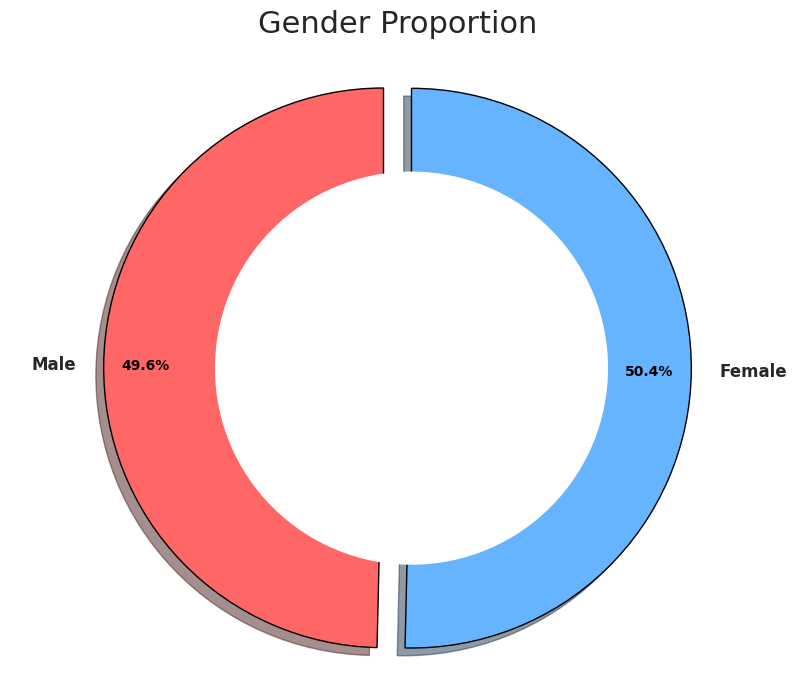

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame
Male = (df['Gender'] == 'Male').sum()
Female = (df['Gender'] == 'Female').sum()

# Proportions for each category
proportions = [Male, Female]

# Gradient colors
colors = ['#ff6666', '#66b3ff']  # Gradient shades

# Plot the donut chart
plt.figure(figsize=(10,8), dpi=100)

# Plot pie chart and store wedges and text elements
wedges, texts, autotexts = plt.pie(
    proportions,
    labels=['Male', 'Female'],  # Labels for the pie chart
    explode=(0.1, 0),  # Slight explosion for the first slice
    startangle=90,  # Start at 90 degrees
    autopct='%1.1f%%',  # Display percentages
    shadow=True,  # Add shadow for depth
    colors=colors,  # Use gradient colors
    pctdistance=0.85,  # Place percentage labels outside the pie
    wedgeprops={'edgecolor': 'black'}  # Add black border around slices
)

# Draw a circle at the center to make it a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Customize text appearance
plt.setp(texts, size=12, fontweight='bold')
plt.setp(autotexts, size=10, color="black", fontweight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Title
plt.title("Gender Proportion", size=22, pad=20)

# Show the chart
plt.show()




In this section, we created a donut chart for the Gender proportion of the human based on their gender. That is, how many of the data were male and how many of data are female. We created a donut chart for the based on their proporsion. If we consider total percentage of the human as 100%, from the graph, we can see that 49.6% were male and 50.4% were female.

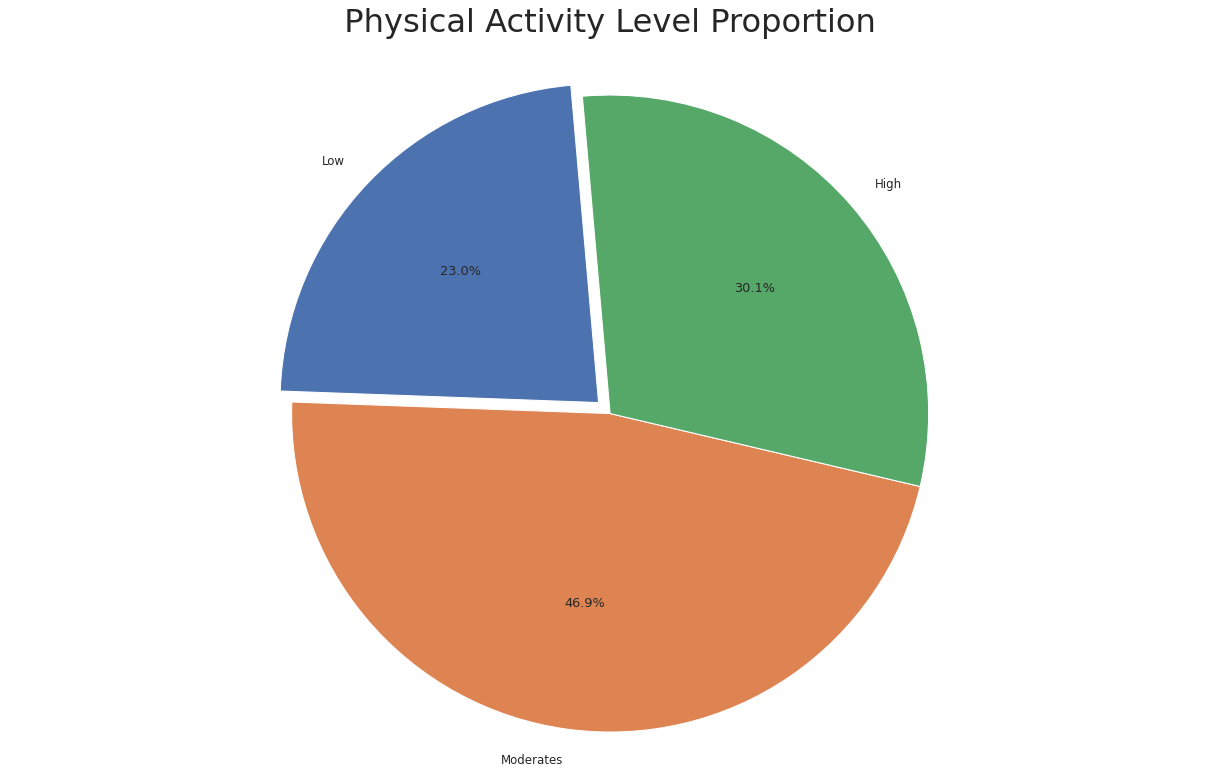

In [ ]:
# Physical Activity Level proportion
import matplotlib.pyplot as plt
Low= (df['Physical Activity Level'] == 'Low').sum()
Moderate= (df['Physical Activity Level']== 'Moderate').sum()
High = (df['Physical Activity Level']== 'High').sum()
proportions = [High,Moderate,Low]

plt.figure(figsize=(20,12), dpi=77)
plt.pie(proportions, data=df, labels= ['Low', 'Moderates','High'], explode = (0.05,0,0), startangle=95, autopct='%1.1f%%', shadow=False)
plt.axis('equal')
plt.title(" Physical Activity Level Proportion", size=30, pad=20)
plt.show()

In this section, we created a pie chart for the Physical Activity Level Proportion based on our data. That is, how many of the humans have high activity level, how many have moderates activity level and how many have low activity level. We created a pie chart for the based on their proporsion. If we consider total percentage of the data as 100%, from the graph, we can see that 30.1% of the data have high activity level, 46.9% have moderate activity level and 23.0% have low activity level.

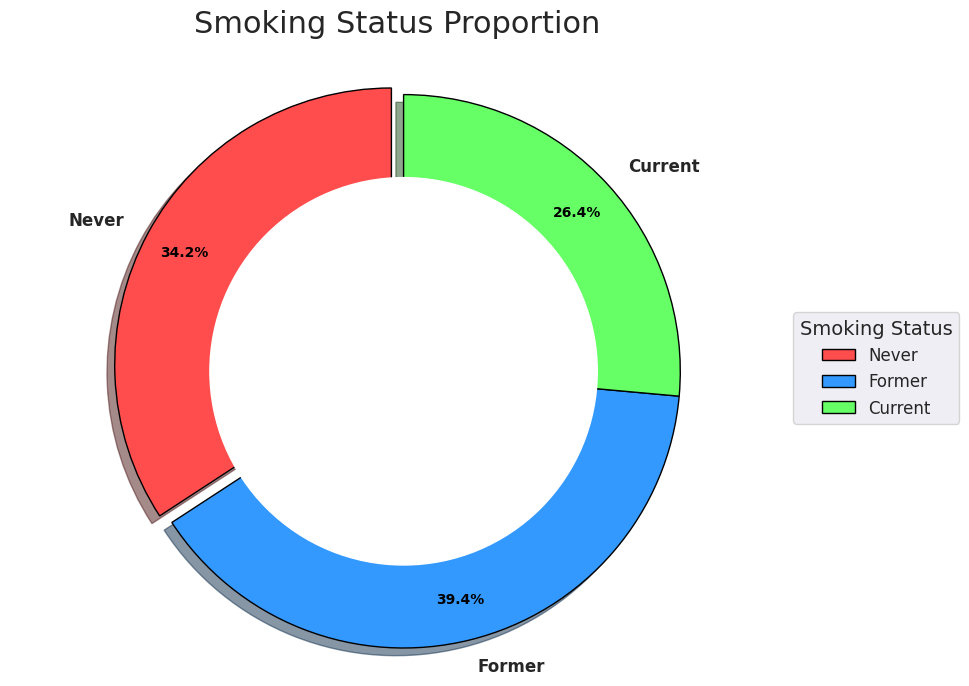

In [ ]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
Never = (df['Smoking Status'] == 'Never').sum()
Former = (df['Smoking Status'] == 'Former').sum()
Current = (df['Smoking Status'] == 'Current').sum()

# Proportions for each category
proportions = [Never, Former, Current]

# Colors for each slice
colors = ['#ff4d4d', '#3399ff', '#66ff66']  # Deep red, blue, and green

# Plot the pie chart with donut style and deep colors
plt.figure(figsize=(10,8), dpi=100)

# Plot pie chart and store wedges and text elements
wedges, texts, autotexts = plt.pie(
    proportions,
    labels=['Never', 'Former', 'Current'],  # Labels for the pie chart
    explode=(0.05, 0, 0),  # Slight explosion for the first slice
    startangle=90,  # Start at 90 degrees
    autopct='%1.1f%%',  # Display percentages
    shadow=True,  # Add shadow for depth
    colors=colors,  # Use deep colors
    pctdistance=0.85,  # Place percentage labels outside the pie
    wedgeprops={'edgecolor': 'black'}  # Add black border around slices
)

# Draw a circle at the center to make it a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Customize text appearance
plt.setp(texts, size=12, fontweight='bold')
plt.setp(autotexts, size=10, color="black", fontweight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Title
plt.title("Smoking Status Proportion", size=22, pad=20)

# Legend
plt.legend(wedges, ['Never', 'Former', 'Current'],
           title="Smoking Status",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1),
           fontsize=12,
           title_fontsize=14)

# Show the chart
plt.show()



In this section, we created a donut chart for the Smoking Status proportion of individuals based on their smoking habits. That is, how many of the data points represent never, formar and current smokers. We created a donut chart based on their proportion. If we consider the total percentage of individuals as 100%, from the graph, we can see that 34.2% were Never, 26.4% were current and 39.4% were former smokers.

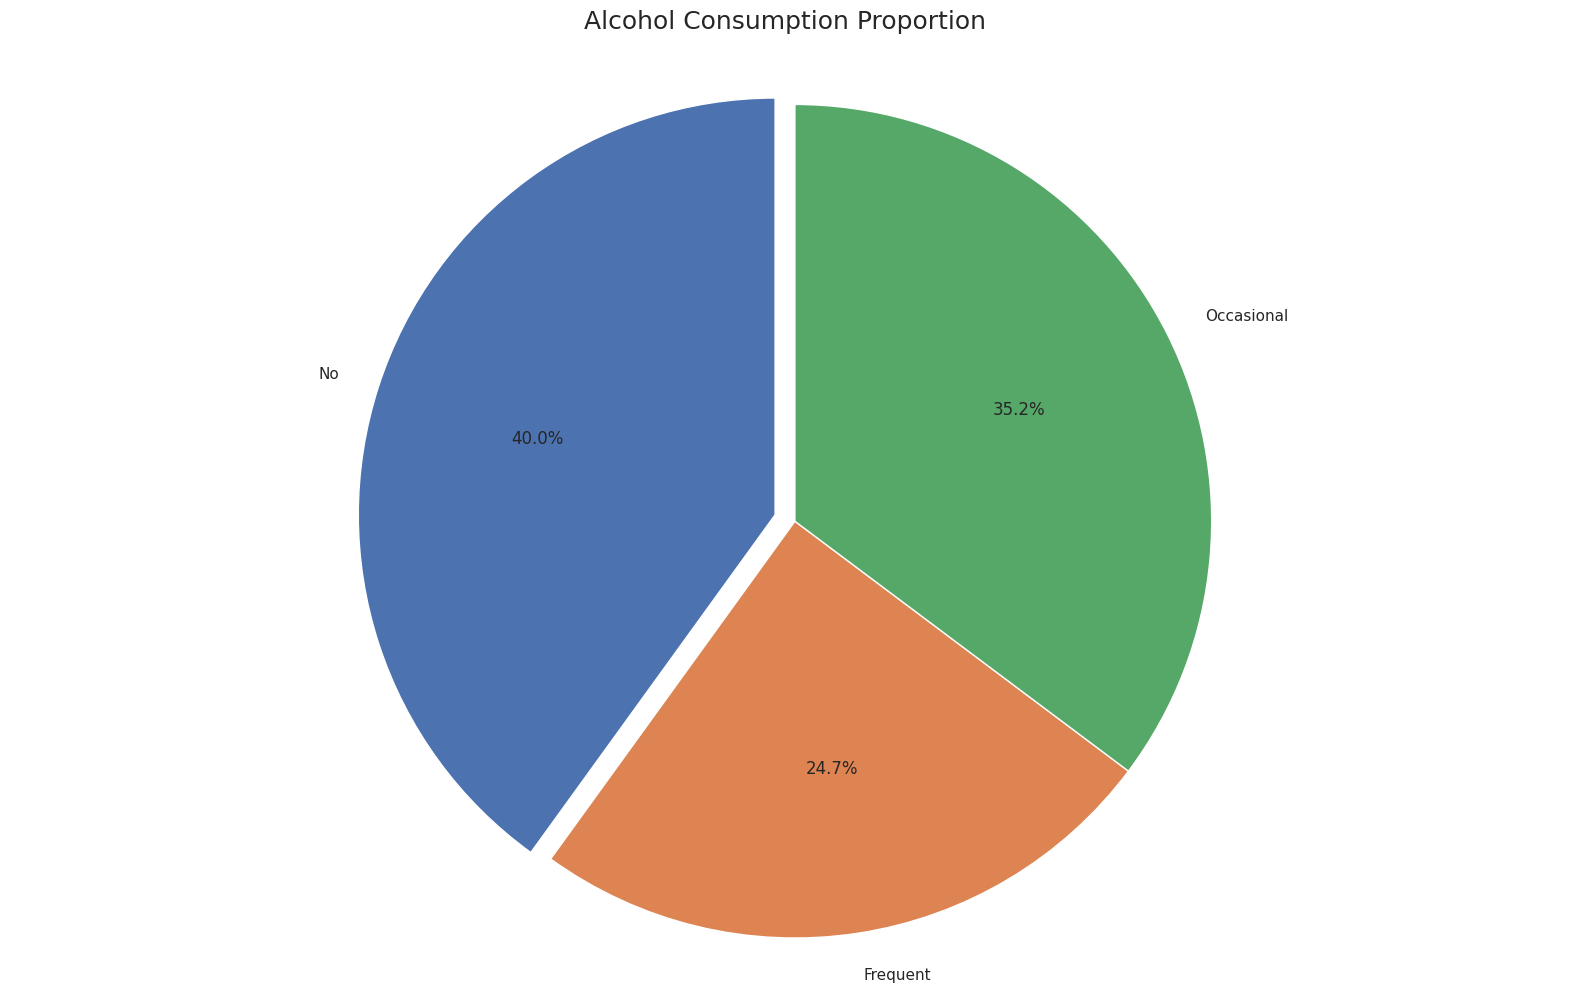

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Counting occurrences of each category in the Alcohol Consumption column
No = (df['Alcohol Consumption'] == 'No').sum()
Frequent = (df['Alcohol Consumption'] == 'Frequent').sum()
Occasional = (df['Alcohol Consumption'] == 'Occasional').sum()

# Checking if any values are missing or NaN
proportions = [No, Frequent, Occasional]

# Ensure that there are no NaN or invalid values
if not all(np.isfinite(proportions)):
    print("Error: Proportions contain invalid or NaN values.")
else:
    # Plot the pie chart if data is valid
    plt.figure(figsize=(20,12), dpi=100)
    plt.pie(
        proportions,
        labels=['No', 'Frequent', 'Occasional'],  # Labels for the pie chart
        explode=(0.05, 0, 0),  # Slight explosion for the first slice
        startangle=90,  # Start at 90 degrees
        autopct='%1.1f%%',  # Display percentages
        shadow=False  # No shadow
    )
    plt.axis('equal')  # Ensures the pie chart is a circle
    plt.title("Alcohol Consumption Proportion", size=18, pad=20)
    plt.show()


In this section, we created a pie chart for the Alcohol Consumption Proportion based on our data. That is, how many individuals do not consume alcohol, how many are frequent drinkers, and how many are occasional drinkers. We created a pie chart based on their proportion. If we consider the total percentage of the data as 100%, from the graph, we can see that 40.0% of the individuals do not consume alcohol, 24.7% are frequent drinkers and 35.2% are occasional drinkers.



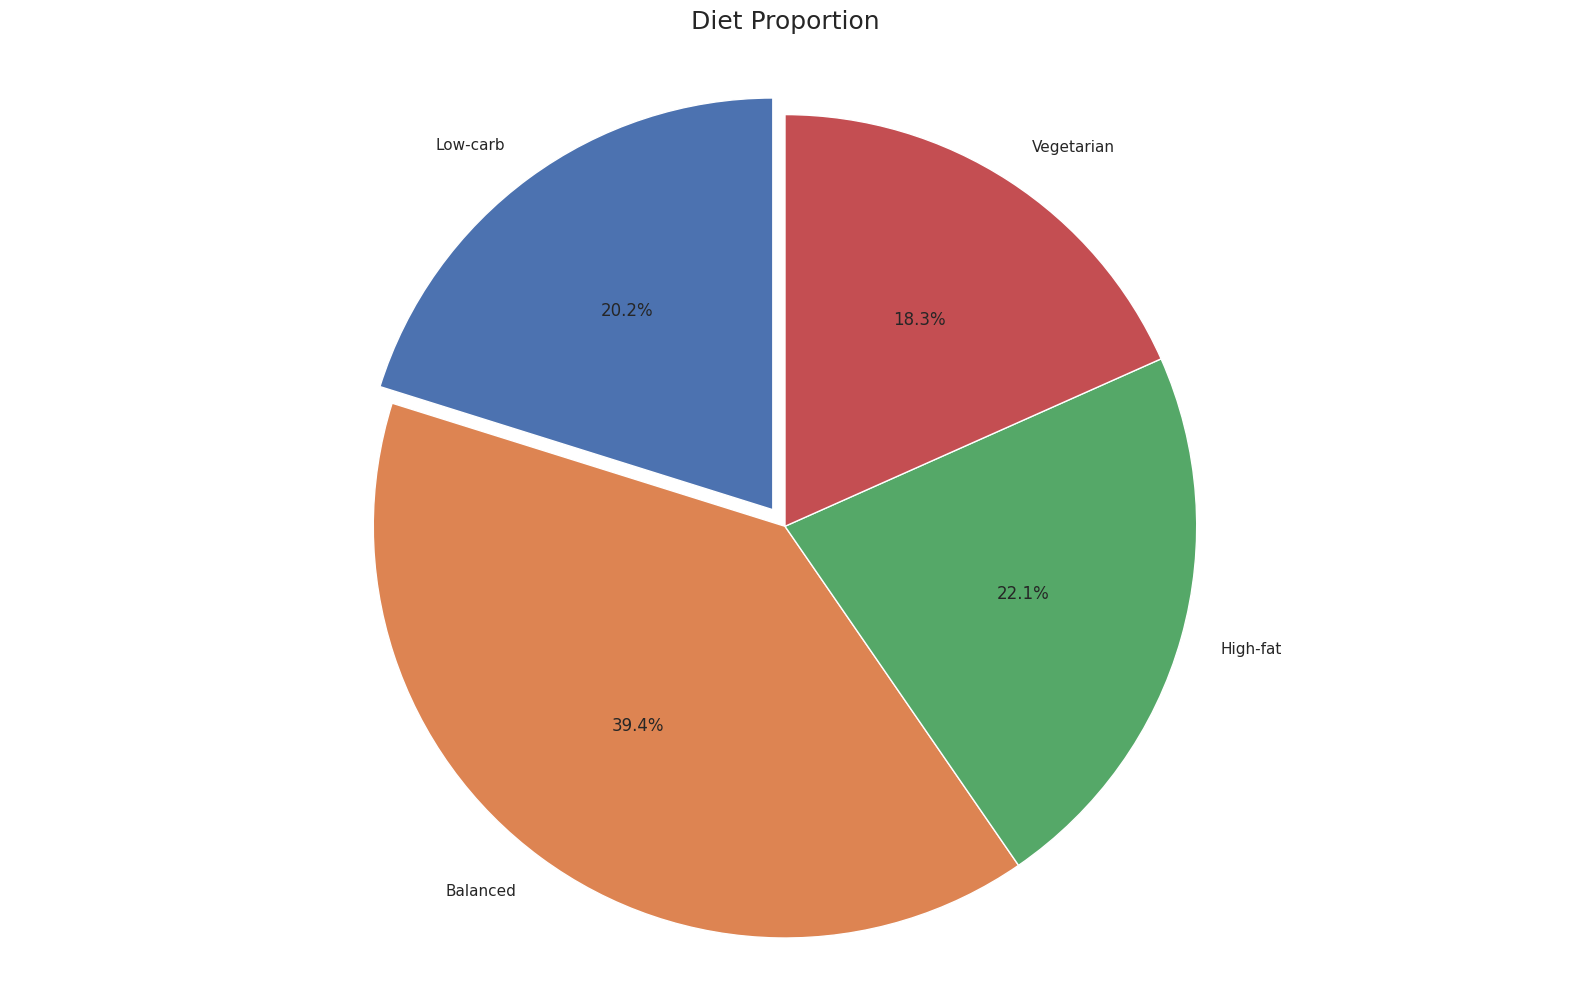

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Counting occurrences of each category in the Diet column
Low_carb = (df['Diet'] == 'Low-carb').sum()
Balanced = (df['Diet'] == 'Balanced').sum()
High_fat = (df['Diet'] == 'High-fat').sum()
Vegetarian = (df['Diet'] == 'Vegetarian').sum()

# Checking if any values are missing or NaN
proportions = [Low_carb, Balanced, High_fat, Vegetarian]

# Ensure that there are no NaN or invalid values
if not all(np.isfinite(proportions)):
    print("Error: Proportions contain invalid or NaN values.")
else:
    # Plot the pie chart if data is valid
    plt.figure(figsize=(20,12), dpi=100)
    plt.pie(
        proportions,
        labels=['Low-carb', 'Balanced', 'High-fat', 'Vegetarian'],  # Labels for the pie chart
        explode=(0.05, 0, 0, 0),  # Slight explosion for the first slice
        startangle=90,  # Start at 90 degrees
        autopct='%1.1f%%',  # Display percentages
        shadow=False  # No shadow
    )
    plt.axis('equal')  # Ensures the pie chart is a circle
    plt.title("Diet Proportion", size=18, pad=20)
    plt.show()


In this section, we created a pie chart for the Diet Proportion based on our data. That is, how many individuals follow a low-carb diet, a balanced diet, a high-fat diet, or a vegetarian diet. We created a pie chart based on their proportion. If we consider the total percentage of the data as 100%, from the graph, we can see that 20.2% of the individuals follow a low-carb diet, 39.4% follow a balanced diet, 22.1% follow a high-fat diet, and 18.3% follow a vegetarian diet.

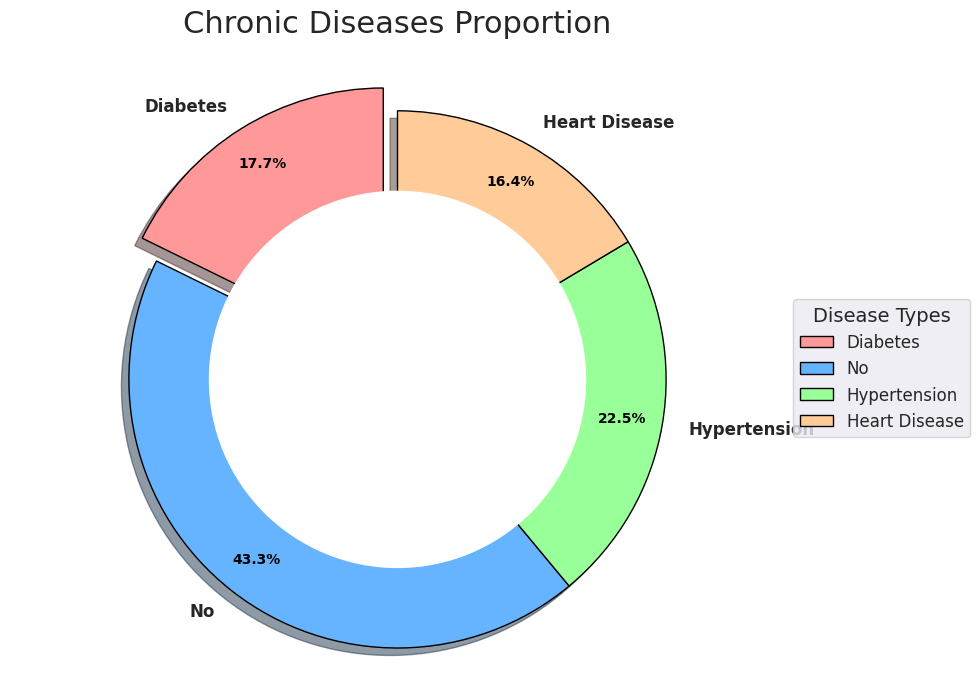

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Counting occurrences of each category in the Chronic Diseases column
Diabetes = (df['Chronic Diseases'] == 'Diabetes').sum()
No = (df['Chronic Diseases'] == 'No').sum()
Hypertension = (df['Chronic Diseases'] == 'Hypertension').sum()
Heart_Disease = (df['Chronic Diseases'] == 'Heart Disease').sum()

# Proportions for each category
proportions = [Diabetes, No, Hypertension, Heart_Disease]

# Checking if any values are missing or NaN
if not all(np.isfinite(proportions)):
    print("Error: Proportions contain invalid or NaN values.")
else:
    # Deep color palette for each category
    colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']  # Light red, blue, green, and orange

    # Plot the pie chart with donut style and gradient colors
    plt.figure(figsize=(10,8), dpi=100)

    # Plot pie chart and store wedges and text elements
    wedges, texts, autotexts = plt.pie(
        proportions,
        labels=['Diabetes', 'No', 'Hypertension', 'Heart Disease'],  # Labels for the pie chart
        explode=(0.1, 0, 0, 0),  # Slight explosion for the first slice
        startangle=90,  # Start at 90 degrees
        autopct='%1.1f%%',  # Display percentages
        shadow=True,  # Add shadow for depth
        colors=colors,  # Use custom colors
        pctdistance=0.85,  # Place percentage labels outside the pie
        wedgeprops={'edgecolor': 'black'}  # Add black border around slices
    )

    # Draw a circle at the center to make it a donut chart
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    # Customize text appearance
    plt.setp(texts, size=12, fontweight='bold')
    plt.setp(autotexts, size=10, color="black", fontweight='bold')

    # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.axis('equal')

    # Title
    plt.title("Chronic Diseases Proportion", size=22, pad=20)

    # Legend
    plt.legend(wedges, ['Diabetes', 'No', 'Hypertension', 'Heart Disease'],
               title="Disease Types",
               loc="center left",
               bbox_to_anchor=(1, 0, 0.5, 1),
               fontsize=12,
               title_fontsize=14)

    # Show the chart
    plt.show()


In this section, we created a donut chart for the Chronic Diseases proportion based on the health conditions present in the data. That is, how many of the individuals have diabetes, hypertension, heart disease or none of these conditions. We created a donut chart based on their proportion. If we consider the total percentage of individuals as 100%, from the graph, we can see that 17.7% had diabetes, 43.3% had no chronic disease, 22.5% had hypertension and 16.4% had heart disease.

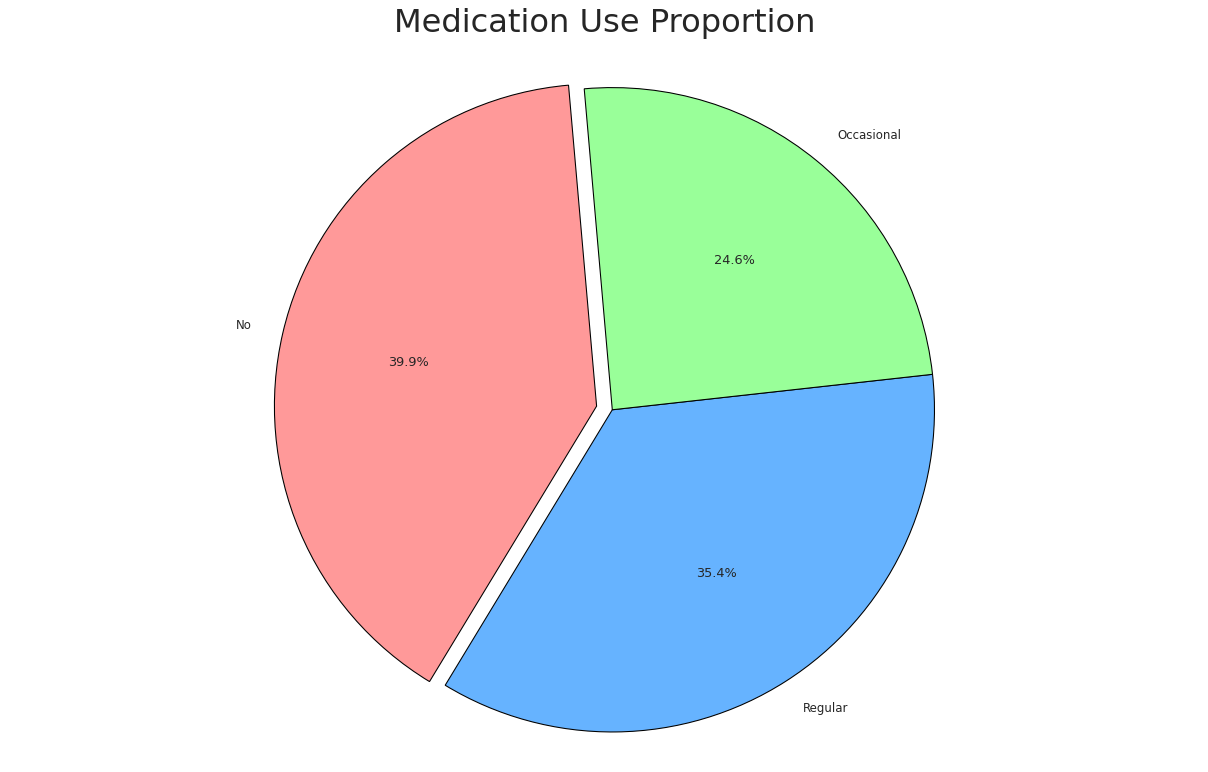

In [ ]:
import matplotlib.pyplot as plt

# Counting occurrences of each category in the Medication Use column
No = (df['Medication Use'] == 'No').sum()
Regular = (df['Medication Use'] == 'Regular').sum()
Occasional = (df['Medication Use'] == 'Occasional').sum()

# Proportions for each category
proportions = [No, Regular, Occasional]

# Deep color palette for each category
colors = ['#ff9999', '#66b3ff', '#99ff99']  # Light red, blue, and green

# Plot the pie chart
plt.figure(figsize=(20,12), dpi=77)

plt.pie(
    proportions,
    labels=['No', 'Regular', 'Occasional'],  # Labels for the pie chart
    explode=(0.05, 0, 0),  # Slight explosion for the first slice
    startangle=95,  # Start at 95 degrees
    autopct='%1.1f%%',  # Display percentages
    shadow=False,  # No shadow
    colors=colors,  # Use deep colors
    wedgeprops={'edgecolor': 'black'}  # Add black border around slices
)

plt.axis('equal')  # Ensures the pie chart is a circle
plt.title("Medication Use Proportion", size=30, pad=20)
plt.show()


In this section, we created a pie chart for the Medication Use Proportion based on our data. That is, how many individuals do not use medication, how many use medication regularly, and how many use medication occasionally. We created a pie chart based on their proportion. If we consider the total percentage of the data as 100%, from the graph, we can see that 39.9% of the individuals do not use medication, 35.4% use medication regularly, and 24.6% use medication occasionally.



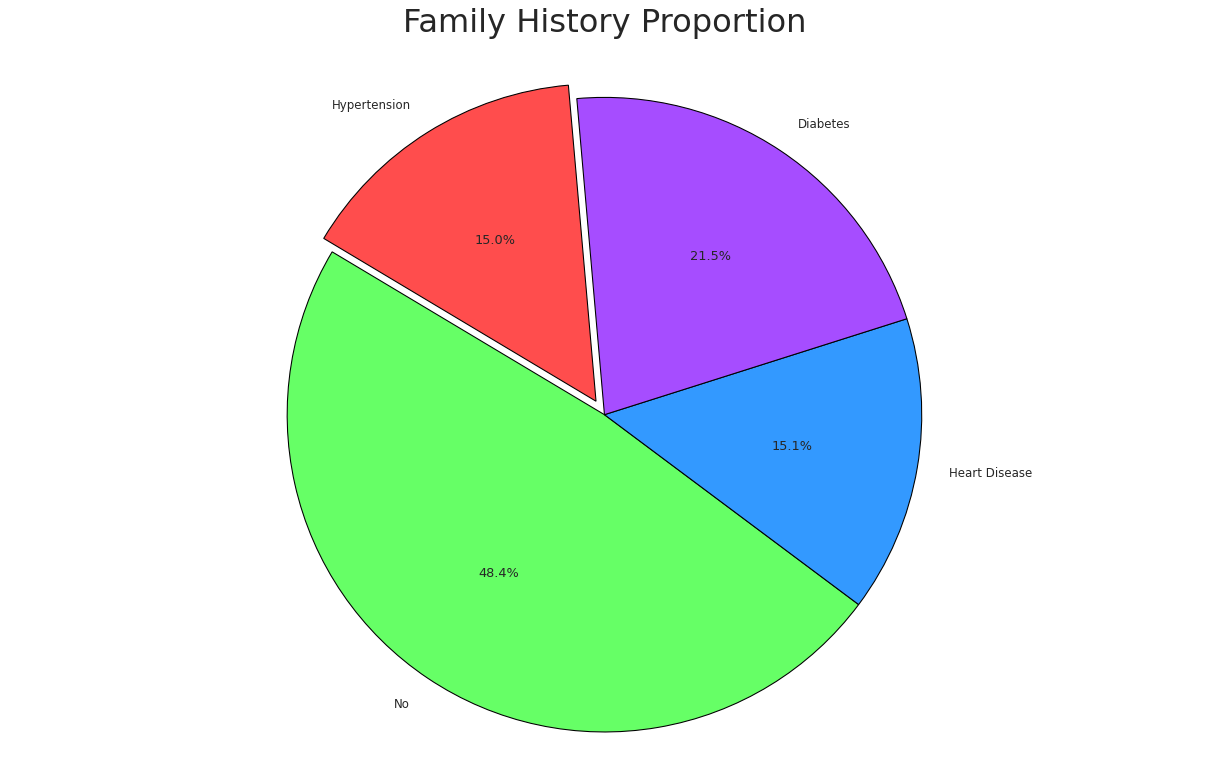

In [ ]:
import matplotlib.pyplot as plt

# Counting occurrences of each category in the Family History column
Hypertension = (df['Family History'] == 'Hypertension').sum()
No = (df['Family History'] == 'No').sum()
Heart_Disease = (df['Family History'] == 'Heart Disease').sum()
Diabetes = (df['Family History'] == 'Diabetes').sum()

# Proportions for each category
proportions = [Hypertension, No, Heart_Disease, Diabetes]

# Deep color palette for each category
colors = ['#ff4d4d', '#66ff66', '#3399ff', '#a64dff']  # Red, Green, Blue, Purple

# Plot the pie chart
plt.figure(figsize=(20,12), dpi=77)

plt.pie(
    proportions,
    labels=['Hypertension', 'No', 'Heart Disease', 'Diabetes'],  # Labels for the pie chart
    explode=(0.05, 0, 0, 0),  # Slight explosion for the first slice
    startangle=95,  # Start at 95 degrees
    autopct='%1.1f%%',  # Display percentages
    shadow=False,  # No shadow
    colors=colors,  # Use the specified deep colors
    wedgeprops={'edgecolor': 'black'}  # Add black border around slices
)

plt.axis('equal')  # Ensures the pie chart is a circle
plt.title("Family History Proportion", size=30, pad=20)
plt.show()




In this section, we created a pie chart for the Family History Proportion based on our data. That is, how many individuals have a family history of hypertension, no family history of chronic diseases, a history of heart disease or a history of diabetes. We created a pie chart based on their proportion. If we consider the total percentage of the data as 100%, from the graph, we can see that 15.0% of the individuals have a family history of hypertension, 48.4% have no family history of chronic diseases, 15.1% have a family history of heart disease and 21.5% have a family history of diabetes.

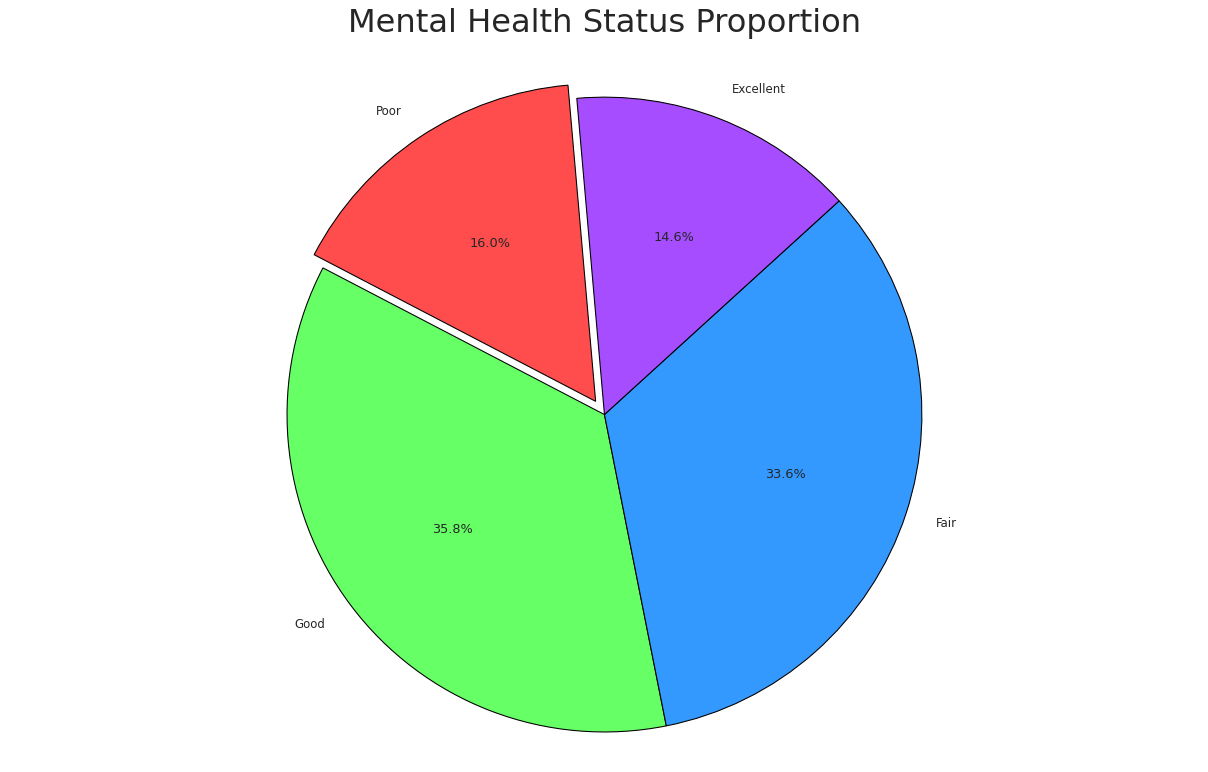

In [ ]:
import matplotlib.pyplot as plt

# Counting occurrences of each category in the Mental Health Status column
Poor = (df['Mental Health Status'] == 'Poor').sum()
Good = (df['Mental Health Status'] == 'Good').sum()
Fair = (df['Mental Health Status'] == 'Fair').sum()
Excellent = (df['Mental Health Status'] == 'Excellent').sum()

# Proportions for each category
proportions = [Poor, Good, Fair, Excellent]

# Deep color palette for each category
colors = ['#ff4d4d', '#66ff66', '#3399ff', '#a64dff']  # Red, Green, Blue, Purple

# Plot the pie chart
plt.figure(figsize=(20,12), dpi=77)

plt.pie(
    proportions,
    labels=['Poor', 'Good', 'Fair', 'Excellent'],  # Labels for the pie chart
    explode=(0.05, 0, 0, 0),  # Slight explosion for the first slice
    startangle=95,  # Start at 95 degrees
    autopct='%1.1f%%',  # Display percentages
    shadow=False,  # No shadow
    colors=colors,  # Use the specified deep colors
    wedgeprops={'edgecolor': 'black'}  # Add black border around slices
)

plt.axis('equal')  # Ensures the pie chart is a circle
plt.title("Mental Health Status Proportion", size=30, pad=20)
plt.show()


In this section, we created a pie chart for the Mental Health Status Proportion based on our data. That is, how many individuals reported poor, fair, good or excellent mental health. We created a pie chart based on their proportion. If we consider the total percentage of the data as 100%, from the graph, we can see that 16.0% of the individuals reported poor mental health, 33.6% reported fair mental health, 35.8% reported good mental health and 14.6% reported excellent mental health.



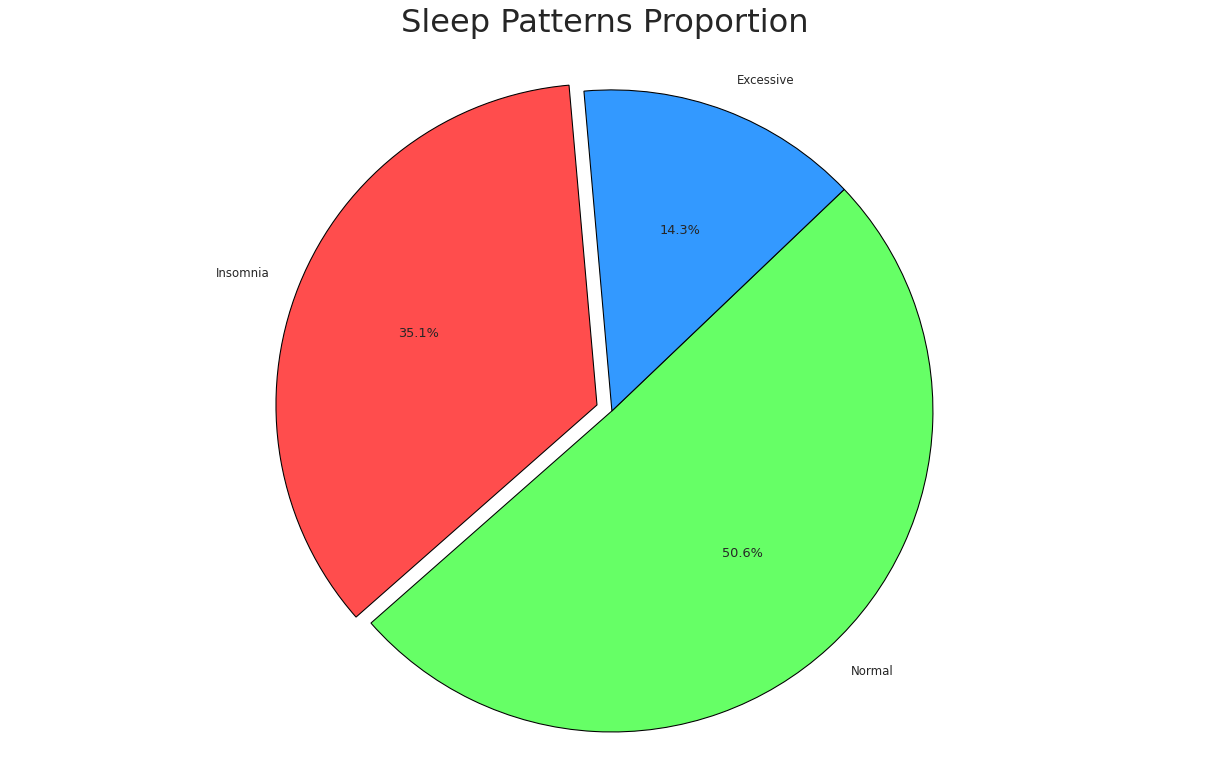

In [ ]:
import matplotlib.pyplot as plt

# Counting occurrences of each category in the Sleep Patterns column
Insomnia = (df['Sleep Patterns'] == 'Insomnia').sum()
Normal = (df['Sleep Patterns'] == 'Normal').sum()
Excessive = (df['Sleep Patterns'] == 'Excessive').sum()

# Proportions for each category
proportions = [Insomnia, Normal, Excessive]

# Deep color palette for each category
colors = ['#ff4d4d', '#66ff66', '#3399ff']  # Red, Green, Blue

# Plot the pie chart
plt.figure(figsize=(20,12), dpi=77)

plt.pie(
    proportions,
    labels=['Insomnia', 'Normal', 'Excessive'],  # Labels for the pie chart
    explode=(0.05, 0, 0),  # Slight explosion for the first slice
    startangle=95,  # Start at 95 degrees
    autopct='%1.1f%%',  # Display percentages
    shadow=False,  # No shadow
    colors=colors,  # Use the specified deep colors
    wedgeprops={'edgecolor': 'black'}  # Add black border around slices
)

plt.axis('equal')  # Ensures the pie chart is a circle
plt.title("Sleep Patterns Proportion", size=30, pad=20)
plt.show()


In this section, we created a pie chart for the Sleep Patterns Proportion based on our data. That is, how many individuals experience insomnia, have normal sleep patterns or have excessive sleep. We created a pie chart based on their proportion. If we consider the total percentage of the data as 100%, from the graph, we can see that 35.1% of the individuals experience insomnia, 50.6% have normal sleep patterns and 14.3% have excessive sleep.

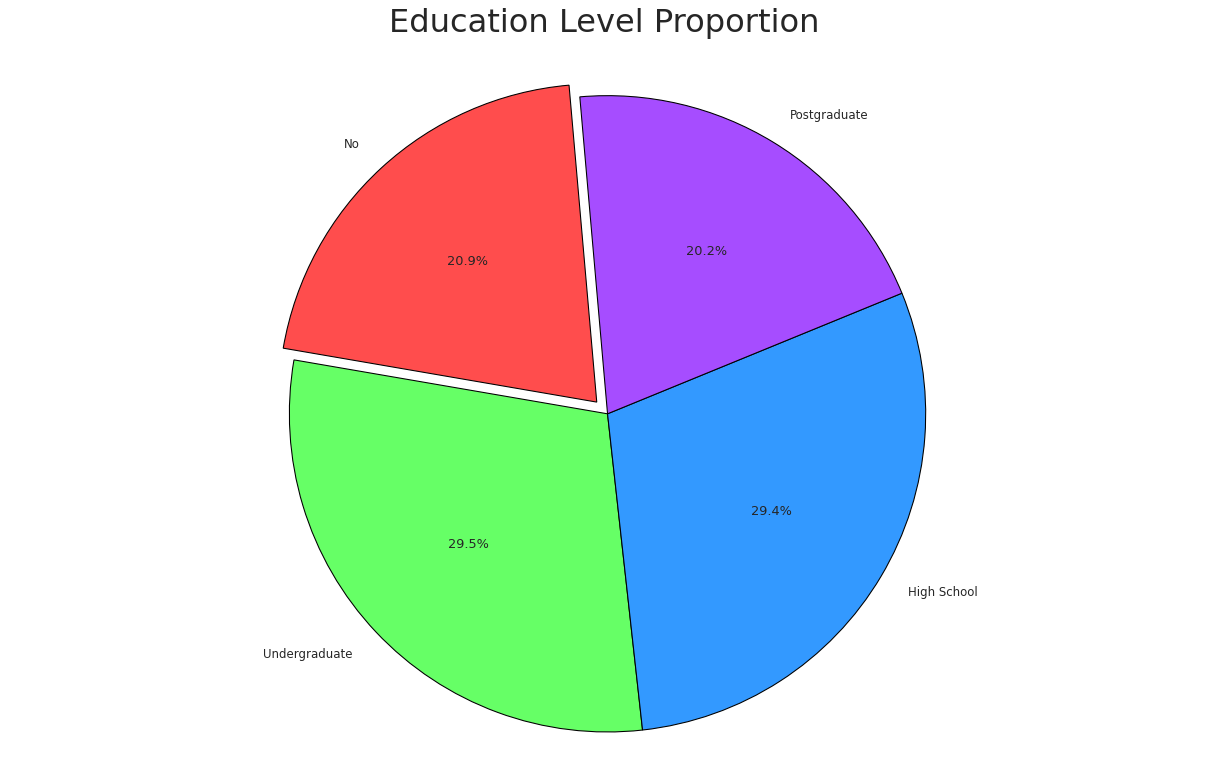

In [ ]:
import matplotlib.pyplot as plt

# Counting occurrences of each category in the Education Level column
No = (df['Education Level'] == 'No').sum()
Undergraduate = (df['Education Level'] == 'Undergraduate').sum()
High_School = (df['Education Level'] == 'High School').sum()
Postgraduate = (df['Education Level'] == 'Postgraduate').sum()

# Proportions for each category
proportions = [No, Undergraduate, High_School, Postgraduate]

# Deep color palette for each category
colors = ['#ff4d4d', '#66ff66', '#3399ff', '#a64dff']  # Red, Green, Blue, Purple

# Plot the pie chart
plt.figure(figsize=(20,12), dpi=77)

plt.pie(
    proportions,
    labels=['No', 'Undergraduate', 'High School', 'Postgraduate'],  # Labels for the pie chart
    explode=(0.05, 0, 0, 0),  # Slight explosion for the first slice
    startangle=95,  # Start at 95 degrees
    autopct='%1.1f%%',  # Display percentages
    shadow=False,  # No shadow
    colors=colors,  # Use the specified deep colors
    wedgeprops={'edgecolor': 'black'}  # Add black border around slices
)

plt.axis('equal')  # Ensures the pie chart is a circle
plt.title("Education Level Proportion", size=30, pad=20)
plt.show()


In this section, we created a pie chart for the Education Level Proportion based on our data. That is, how many individuals have no formal education, completed high school, pursued undergraduate studies or obtained a postgraduate degree. We created a pie chart based on their proportion. If we consider the total percentage of the data as 100%, from the graph, we can see that 20.9% of the individuals have no formal education, 29.4% completed high school, 29.5% pursued undergraduate studies and 20.2% obtained a postgraduate degree.

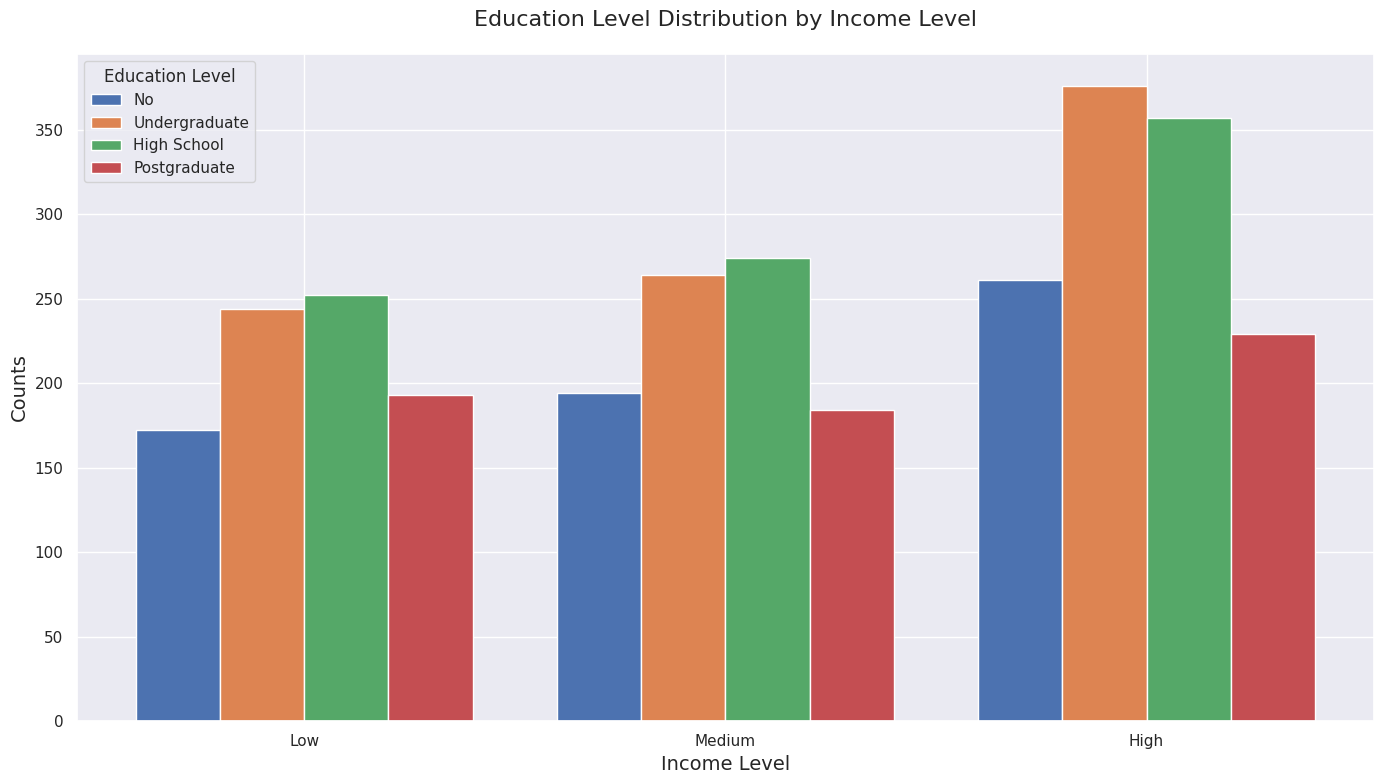

In [ ]:
#Grouped Bar Chart
# Sample data
education_levels = ['No', 'Undergraduate', 'High School', 'Postgraduate']
income_levels = ['Low', 'Medium', 'High']

# Count occurrences for each combination of education and income levels
education_income_counts = df.groupby(['Education Level', 'Income Level']).size().unstack(fill_value=0)

# Prepare data for plotting
education_counts = education_income_counts.loc[education_levels].T  # Transpose for easier plotting

# Plotting
fig, ax = plt.subplots(figsize=(14, 8), dpi=100)

# Bar width
bar_width = 0.2
index = np.arange(len(income_levels))

# Plot bars for each education level
for i, education in enumerate(education_levels):
    bars = ax.bar(index + i * bar_width, education_counts[education], bar_width, label=education)

# Add labels, title, and legend
ax.set_xlabel('Income Level', size=14)
ax.set_ylabel('Counts', size=14)
ax.set_title('Education Level Distribution by Income Level', size=16, pad=20)
ax.set_xticks(index + bar_width * (len(education_levels) - 1) / 2)
ax.set_xticklabels(income_levels)
ax.legend(title='Education Level')

# Show plot
plt.tight_layout()
plt.show()




The conclusion deduced from the group bar chart analysis is, education and income are highly correlating. People who have at least finished high school or obtained a university degree are also more likely to retire with higher income levels than those without much education. On the other hand, there was data that showed while individuals with medium and low income levels have had a similar type of educational attainment which could mean education might aid in garnering better earnings.

Income can have large effects on other parts of life, and it also correlates with how rich someone truly is—how they live day-to-day, the healthcare that they access or not have enough of, and what insurances they may be covered by.

Having more money usually means you can afford to spend more of it on quality healthcare, nicer homes, and generally improved life decisions that contribute to better health and a longer lifespan. That relationship calls into question the prediction of age. Being able to afford food, housing and health care makes it easier for people to live a stable life full of physical and emotional well-being—and that may translate into a longer lifespan. People with more money generally have healthier lifestyles: better diets, regular check-ups and lower stress levels; they also have access to resources that can promote longevity. Meanwhile, those in lower income brackets may be exposed to multiple stressors and have fewer opportunities for receiving healthcare that could impact their health as well as life expectancy. In brief, this is a very complicated relationship between education, income and age prediction.

A better quality of life is associated with longevity and higher income, something which generally results from higher education levels.

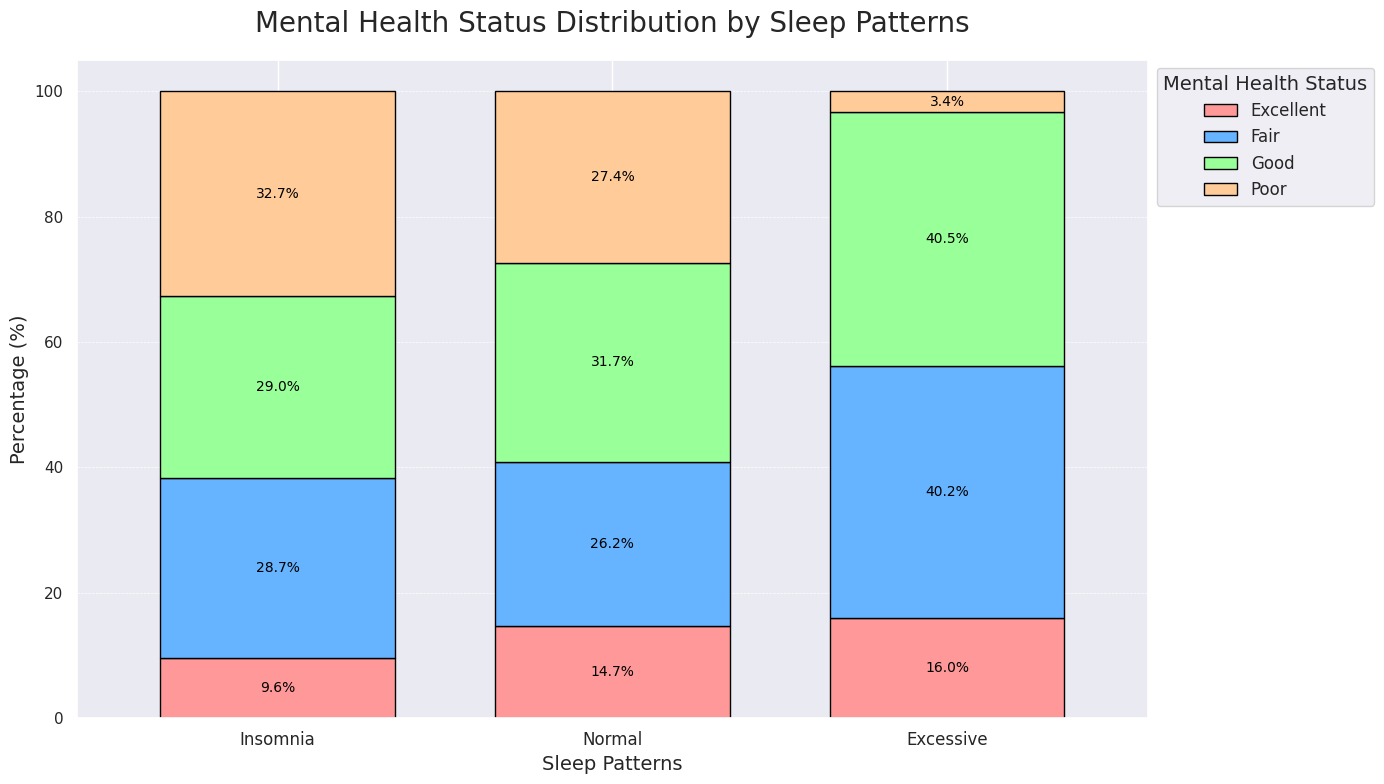

In [ ]:
#Stacked Bar Chart
# Sample data assuming 'Mental Health Status' and 'Sleep Patterns' columns in df
mental_health_levels = ['Poor', 'Good', 'Fair', 'Excellent']
sleep_patterns = ['Insomnia', 'Normal', 'Excessive']

# Count occurrences for each combination of Mental Health Status and Sleep Patterns
mental_health_sleep_counts = df.groupby(['Sleep Patterns', 'Mental Health Status']).size().unstack(fill_value=0)

# Prepare data for plotting (normalize to percentages)
sleep_counts = mental_health_sleep_counts.div(mental_health_sleep_counts.sum(axis=1), axis=0) * 100

# Define a custom color palette
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']  # Red, blue, green, orange for categories

# Create the figure and axis
fig, ax = plt.subplots(figsize=(14, 8), dpi=100)

# Plot stacked bar chart
sleep_counts.plot(kind='bar', stacked=True, ax=ax, color=colors, edgecolor='black', width=0.7)

# Add title and axis labels
ax.set_title('Mental Health Status Distribution by Sleep Patterns', fontsize=20, pad=20)
ax.set_xlabel('Sleep Patterns', fontsize=14)
ax.set_ylabel('Percentage (%)', fontsize=14)

# Customize tick labels
ax.set_xticklabels(['Insomnia', 'Normal', 'Excessive'], rotation=0, fontsize=12)
ax.legend(title='Mental Health Status', fontsize=12, title_fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))

# Annotate the percentages on the bars
for c in ax.containers:
    ax.bar_label(c, label_type='center', fmt='%.1f%%', fontsize=10, color='black')

# Add grid for better readability
ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)

# Tight layout to ensure everything fits well
plt.tight_layout()

# Show the plot
plt.show()



Inspection of the stacked bar chart makes it clear: those suffering from insomnia are vastly reporting worse mental health. Interestingly, merely 9.6% report excellent mental health and more than a third suffer poor demise with the highest in over a decade (32.7%). These data support a robust relationship between sleep disruptions and mental health phenotype.

On the opposite pole, those who report normal sleep distribution display a more positive – less polarized- distribution of mental health statuses. The numbers after adjusting for age are similar: 14.7% of this group have excellent mental health, while 26.2% call it fair; 31.7% call it good; and 27.4% say it is poor. This difference reflects the positive effects that normal sleep patterns may have on mental health more broadly.

In addition, a whopping 40 percent of those who sleep too much among folks with good mental health. Hereby showing that sleep enough and regularly is pivotal to our mental health — supporting the notion that sleep is needed for recovery, energy replenishment in the body.

On a more general level, sleep is critical for mental health and can dramatically impact biological age prediction datasets. Poor sleep quality has been known to contribute to mental well-being in a negative way, but can it have long-term health outcomes as well, suggesting the implementation effective sleep management strategies for healthier lives.

<ipython-input-48-d343fbe0d7ce>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Gender', y='BMI', data=df, palette='Set2', width=0.5, fliersize=8)


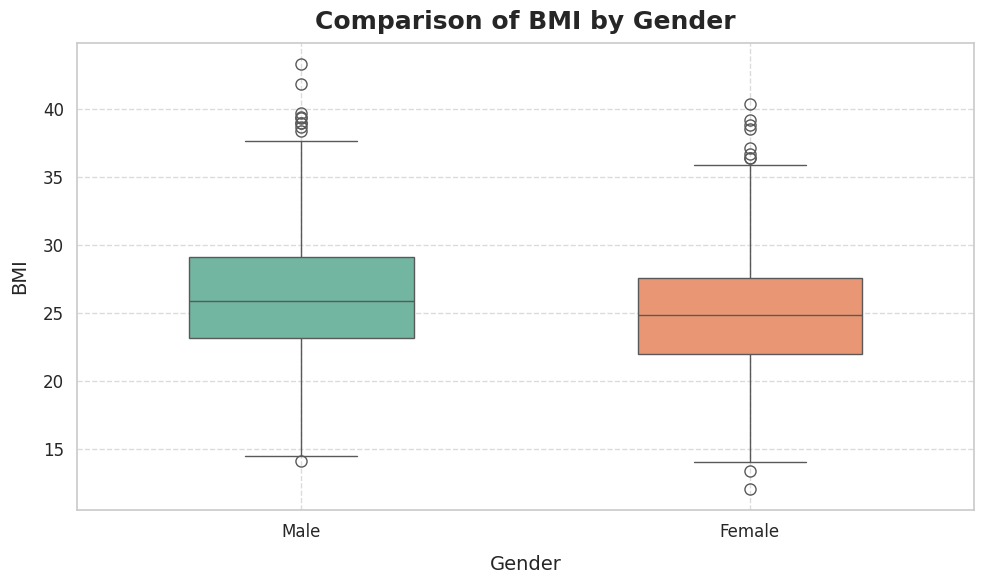

In [ ]:
data = {
    'Gender': ['Male', 'Female'],
    'BMI': df
}


# Set up the figure size and style
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")  # Set the style to whitegrid for a clean look

# Create the boxplot with a refined color palette and additional customizations
ax = sns.boxplot(x='Gender', y='BMI', data=df, palette='Set2', width=0.5, fliersize=8)

# Customize the appearance of the plot
plt.title('Comparison of BMI by Gender', fontsize=18, fontweight='bold', pad=10)
plt.xlabel('Gender', fontsize=14, labelpad=10)
plt.ylabel('BMI', fontsize=14, labelpad=10)

# Enhance the gridlines and add some styling
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjusting the boxplot elements for better aesthetics
for patch in ax.artists:
    patch.set_edgecolor('black')  # Add black edge color to boxes
    patch.set_linewidth(1.5)  # Increase line width for better visibility

# Show the plot
plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()



This boxplot is an example of comparing Body Mass Index (BMI) between males and females, showing some interesting outliers Cite this: Males have an average BMI of 25.35, whereas females have an average BMI recorded at 24.9. This means that, men have relatively higher BMI than women.

By the way, that famous 18–24.9 BMI healthy range places a substantial number of females in the pink fat patterns too. In men, the average BMI approaches the desired range although it is slightly above the upper limit, suggesting that some men may be overweight.

It is important to have Body Mass Index(BMI) in age prediction datasets since it shows the general health and physical condition. A low body mass index is linked to healthier life outcomes as well, including a lower risk of developing chronic conditions and greater physical health. So, awareness of this and tips for how to get (and stay) at an optimal BMI are important in a continuing effort towards healthy living and potentially longer lifespans.

Overall, this boxplot reveals that monitoring BMI is crucial not only for health assessments but also analyses of age prediction.

<ipython-input-49-f95504221bbc>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Gender', y='Stress Levels', data=df, palette='Set2')


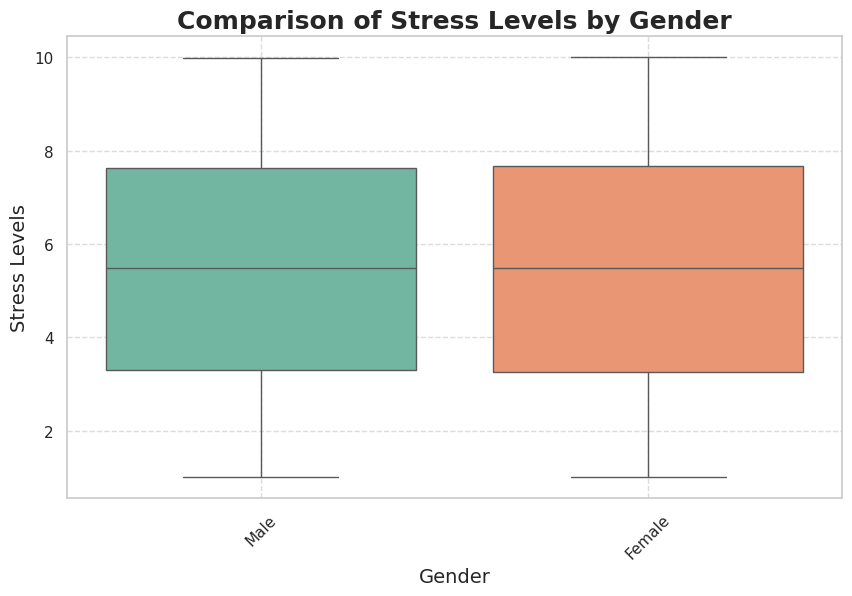

In [ ]:
data = {
    'Gender': df,
    'Stress Levels': df
}


# Set up the figure size and style
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")  # Set the style to whitegrid for better readability

# Create the boxplot with a more distinct color palette and additional customization
ax = sns.boxplot(x='Gender', y='Stress Levels', data=df, palette='Set2')

# Add title and labels with increased font size for clarity
plt.title('Comparison of Stress Levels by Gender', fontsize=18, fontweight='bold')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Stress Levels', fontsize=14)

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Optionally adjust x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()



The boxplot visually describes the comparison of male and female stress levels. Interestingly, no outliers are present in the data, which means that stress levels appear to be more evenly distributed across the two groups.

Both men and women seem more or less equally spun up: their average stress levels reach 5.8 out of 10, the survey results suggested. This finding implies that men and women undergo the same types of stress, indicating environmental or social factors (familial structure, choice of hobbies, professional duties) that lead to similar levels of stress for sentinels have an impact on both species. All in all, the boxplot shows that stress perception is an average point and no outliers are present.

<ipython-input-50-c1accc613bce>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Pollution Exposure', data=df, palette='Set2')
<ipython-input-50-c1accc613bce>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Gender', y='Pollution Exposure', data=df, palette='Set2')
<ipython-input-50-c1accc613bce>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Pollution Exposure', data=df, estimator=np.mean, palette='Set2')


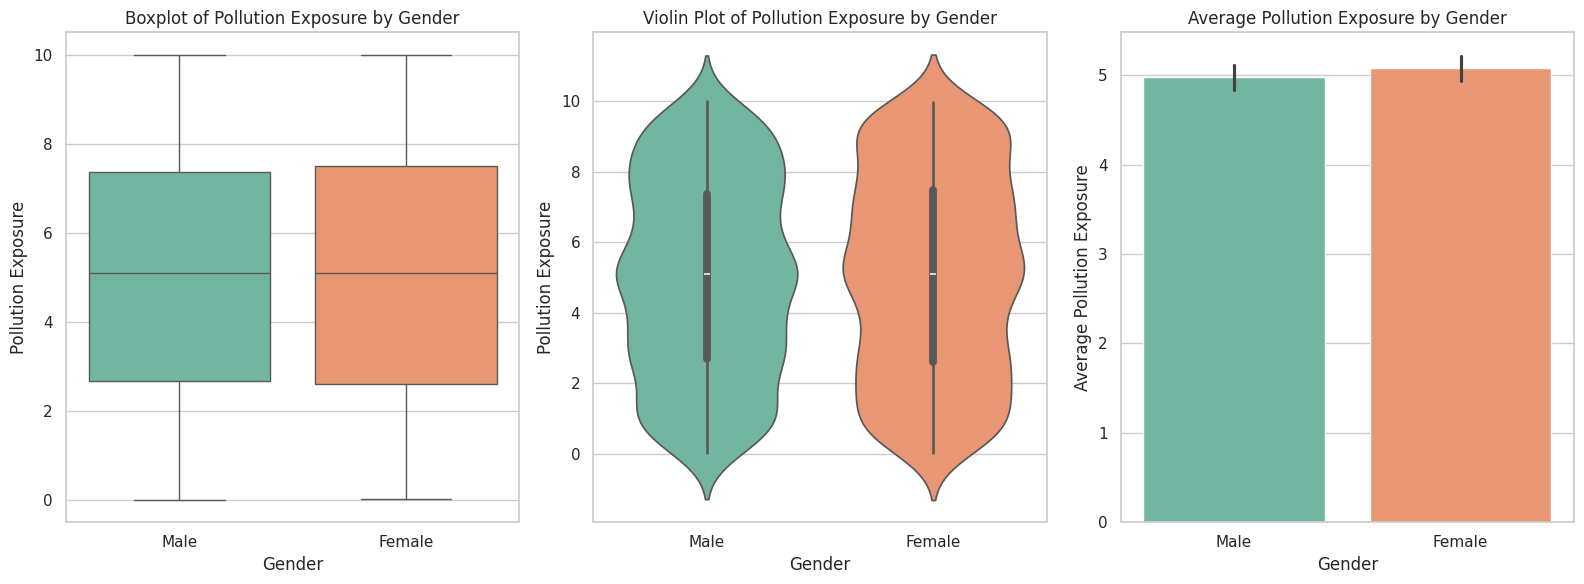

In [ ]:
#multiple plot (box plot, violin plot, bar plot)
# Sample data creation

data = {
    'Gender': df,
    'Pollution Exposure': df
}

# Set up the figure size and style
plt.figure(figsize=(16, 6))

# Boxplot for Pollution Exposure by Gender
plt.subplot(1, 3, 1) # ROW ,COLUMN, POSITION
sns.boxplot(x='Gender', y='Pollution Exposure', data=df, palette='Set2')
plt.title('Boxplot of Pollution Exposure by Gender')
plt.xlabel('Gender')
plt.ylabel('Pollution Exposure')

# Violin Plot for Pollution Exposure by Gender
plt.subplot(1, 3, 2)
sns.violinplot(x='Gender', y='Pollution Exposure', data=df, palette='Set2')
plt.title('Violin Plot of Pollution Exposure by Gender')
plt.xlabel('Gender')
plt.ylabel('Pollution Exposure')

# Bar Plot for Average Pollution Exposure by Gender
plt.subplot(1, 3, 3)
sns.barplot(x='Gender', y='Pollution Exposure', data=df, estimator=np.mean, palette='Set2')
plt.title('Average Pollution Exposure by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Pollution Exposure')

# Adjust layout
plt.tight_layout()
plt.show()



To do this comparison we will take a look at pollution exposure by gender through a boxplot, a violin plot and bar chart in the following analysis.

The boxplot shows that there is no outlier in the data, which in turn indicated a constant distribution of pollution exposure levels. The other is the revelation that females experience even higher levels of pollution than males. This trend is also confirmed by the violin plot that shows a more precise distribution of pollution exposure which and density that confirms female are more hit by pollution than males.

A bar chart for the average pollution exposure levels makes a quantitative case again for what we already observed — female pollution exposure averages 5.1 and male exposure at 6. That tiny variation is representative of the usual flux observed in other plots of this type.

In age prediction datasets this could be valuable information, since constant exposure to pollution over years is related to numerous health complications that can have a substantial impact on life span and overall healt. Understanding sex differences in exposure to pollutants can help us design public health interventions and policies, which target these risks.

In [ ]:
df

,Gender,Height (cm),Weight (kg),Blood Pressure (s/d),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),...,alcohol_map,Diet_map,Gender_map,Chronic_map,Medication_map,History_map,Mental_Health_map,Sleeping_map,Education_Level_map,Income_Level_map
0,Male,171.148359,86.185197,151/109,259.465814,29.423017,157.652848,0.132868,0.200000,58.786198,...,0,2,0,0,0,0,2,1,0,1
1,Male,172.946206,79.641937,134/112,263.630292,26.626847,118.507805,0.629534,0.267312,54.635270,...,1,0,0,1,0,3,2,0,2,1
2,Female,155.945488,49.167058,160/101,207.846206,20.217553,143.587550,0.473487,0.248667,54.564632,...,0,0,1,1,1,1,0,1,0,1
3,Female,169.078298,56.017921,133/94,253.283779,19.595270,137.448581,1.184315,0.513818,79.722963,...,0,0,1,2,2,1,0,1,0,0
4,Female,163.758355,73.966304,170/106,236.119899,27.582078,145.328695,0.434562,0.461668,52.479469,...,2,3,1,0,0,0,2,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Male,161.632502,88.323405,134/91,204.175510,33.807917,112.075747,1.583006,0.665907,27.997736,...,0,1,0,1,1,2,1,0,2,2
2996,Male,163.443512,93.217007,110/78,197.384424,34.894725,101.177691,1.785129,0.461668,32.866623,...,1,1,0,2,2,3,2,0,2,1
2997,Male,168.204068,86.258847,159/116,238.641541,27.268332,110.548146,0.366012,0.200000,39.756270,...,0,2,0,0,0,0,1,0,2,0
2998,Female,168.204068,41.371018,134/82,198.244328,25.343342,123.704379,1.452963,0.461668,43.338594,...,2,0,1,2,1,1,2,1,0,2


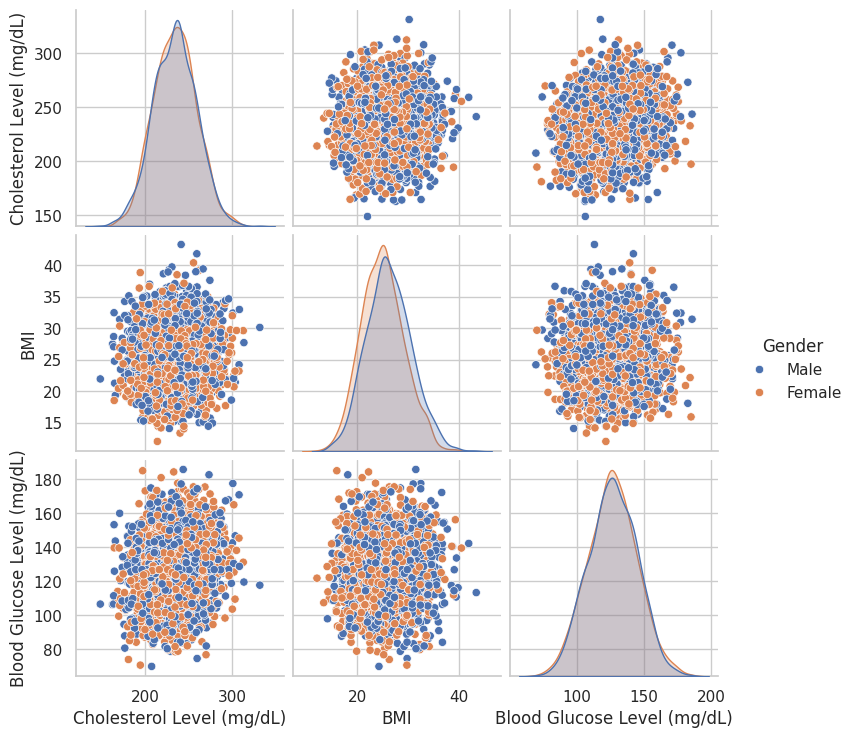

In [ ]:
#pairplot

import seaborn as sns

#  pairplot with hue based on Gender
sns.pairplot(df, hue='Gender', vars=['Cholesterol Level (mg/dL)', 'BMI', 'Blood Glucose Level (mg/dL)'])
plt.show()



The pairplot offers a comprehensive comparison of three critical health metrics: lipid profiles, anthropometrics, and biochemical parameters, including cholesterol levels, BMI, and blood glucose levels; the results were presented separately by the gender. The circle is labelled to show that the male participants are depicted by the blue markers while the female participants are depicted by the yellow markers.

From the analysis, several insights are obtained as explained below. First, it emerges that male subjects had a higher cholesterol mean than females, which could mean that male could be at a greater risk of cardiovascular diseases compared to female and therefore there might be a need to encapsulate this aspect to formulate health policies and intervention for the male subjects in particular. Further, if taking into account the difference in parameters between males and females, it can also be observed that males have a higher average BMI, or which might be linked to lifestyle or diet choices.

On the other hand, female’s outcome reveals high blood glucose level than male outcome. This can be either an indication that there are health problems that need medical attention including those involving high risks of diabetes and other diseases associated with high blood glucose levels.

In general, the pairplot is helpful in revealing the gender differences in these health indicators while always highlighting the relationships between those indicators.

In [ ]:
df.isnull().sum()

,0
Gender,0
Height (cm),0
Weight (kg),0
Blood Pressure (s/d),0
Cholesterol Level (mg/dL),0
BMI,0
Blood Glucose Level (mg/dL),0
Bone Density (g/cm²),0
Vision Sharpness,0
Hearing Ability (dB),0


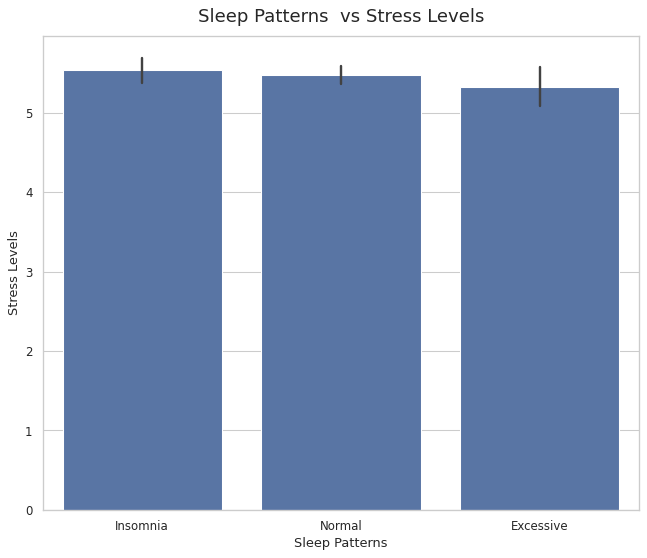

In [ ]:
plt.figure(figsize=(10,8), dpi=77)
sns.barplot(x="Sleep Patterns", y="Stress Levels", data=df)
plt.title("Sleep Patterns  vs Stress Levels", size=17, pad=13 )
plt.show()




The bar plot displayed in the analysis shows the correlation between the sleep patterns and stress level and it is clearly visible that people with isomnia stress levels are visibly higher than people with other types of sleeping habits. This association indicates that sleep disorders have a significant potential to impair mental health and cause various limitations in everyday life.

It is important not to define the effects of these findings in terms of stress alone; lack of sleep also has a ripple effect on other aspects of an individual’s lifestyle, efficiency, and psychological well-being. Constant stress and sleep deprivation are among the factors that cause different physical illnesses, for example, cardiovascular diseases, obesity, and a weakened immune system. Thus, disturbed sleep patterns may have negative effects on the health of an individual in the long run that can even affect the entire life cycle of the person and his potential lifespan.

To sum up, stress and all the threats connected to it recall that healthy sleep is a crucial factor to prevent stress. Thus, acknowledging the connections between sleep stress it is possible to encourage rolling of certain changes in a daily routine promoting a better night sleep and, therefore, improving the physical health all through the human life cycle.

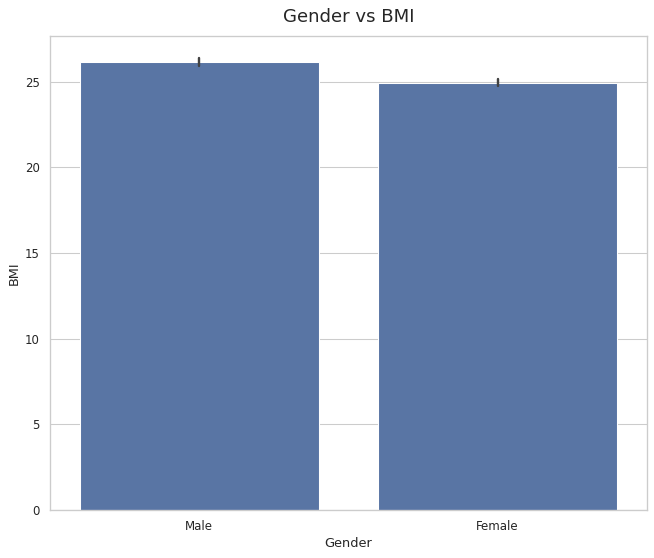

In [ ]:
plt.figure(figsize=(10,8), dpi=77)
sns.barplot(x="Gender", y="BMI", data=df)
plt.title("Gender vs BMI", size=17, pad=13 )
plt.show()

This barplot is an example of comparing Body Mass Index (BMI) between males and females,  Males have an average BMI of 25.35, whereas females have an average BMI recorded at 24.9. This means that, men have relatively higher BMI than women.

By the way, that famous 18–24.9 BMI healthy range places a substantial number of females in the pink fat patterns too. In men, the average BMI approaches the desired range although it is slightly above the upper limit, suggesting that some men may be overweight.



Overall, this boxplot reveals that monitoring BMI is crucial not only for health assessments but also analyses of age prediction.

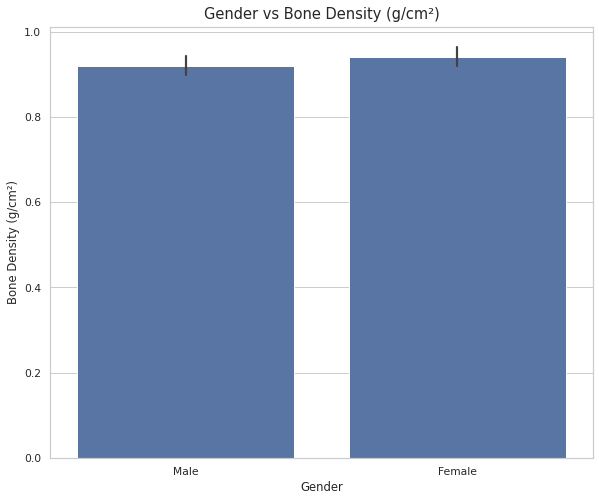

In [ ]:
plt.figure(figsize=(10,8), dpi=70)
sns.barplot(x="Gender", y="Bone Density (g/cm²)", data=df)
plt.title("Gender vs Bone Density (g/cm²)", size=15, pad=8 )
plt.show()

It is evident from the above bar chart that, female bone density surpasses that of the male. This observation points towards the fact that women tend to fare better when it comes to bone density and it slows in the case of men, it lowers much faster.

This difference is significant given that bone density is one of the most important components of human body structural framework and also has a bearing on general health and fitness. High density bones provide for physically engaging framework of an individual’s skeletal system, therefore factors which boost this density like exercise reduce chances of injuries and osteoporosis as people age.

Reduced bone density in men may be as a result of hormonal factors, lifestyle factors and diet. This difference underlines the necessity of prevention when it comes to bone health: exercises which include lifting one’s own weight on the bones, proper diet containing calcium and vitamin D, timely visiting of thedoctor.

Therefore, it is imperative to appreciate the disparity in the BMI of the skeletal frame between males and females in order to come up with sound health interventions. In doing so, it would ensure that there are more robust bones than there are weak bones, and quality of life is boosted hence lifelong functionality is improved.

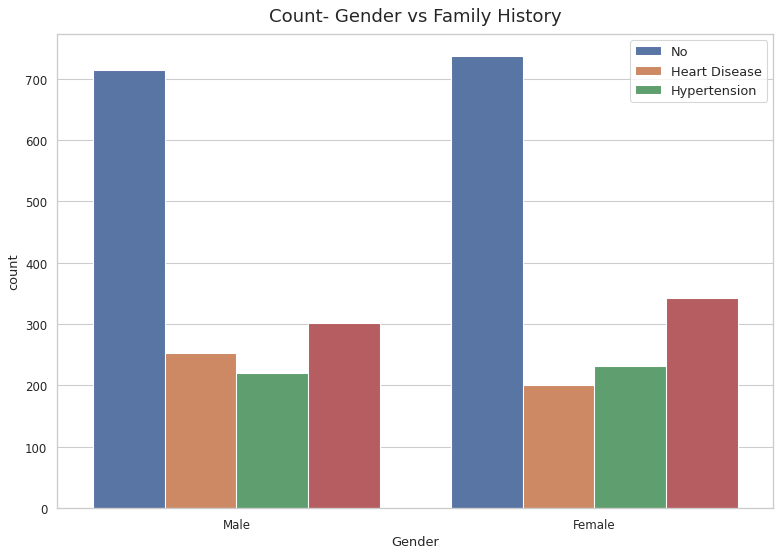

In [ ]:
plt.figure(figsize=(12,8), dpi=77)
sns.countplot(x=df['Gender'],hue=df['Family History'])
plt.title("Count- Gender vs Family History", size=17, pad=12)
plt.legend(['No','Heart Disease','Hypertension'], loc='upper right', prop={'size': 12})

plt.show()

The count plot offers a simplistic view of the health status of families headed by either a male or a female. The information that has been analyzed concerns shows that female-headed families usually have fewer diseases in comparison with male-headed families.

For instance, male families indicate an increased prevalence of this ailment commonly referred to as heart disease which can be explained by numerous causes such as preliminary life choices, type of food intake, and heredity among others. Such findings call for analysing the social and environmental factors affecting family health to address the observed differences in health status.

These disparities may, for example, indicate that female-headed families are more likely to make health-supportive decisions, place a higher premium on prevention, or have superior infrastructures for coping with these diseases. On the other hand, the trend toward higher rates of heart disease among male families may suggest the need for enhanced health promotion efforts, such as raising awareness of heart disease risk factors, improving access to preventative care, and adopting healthy lifestyles.

Overall, the count plot raises worries regarding gender distinctions in family health status and underlines the need for gendered public health approaches. Thus, raising awareness of these discrepancies is a step toward promoting improved health and physical conditions in families, which in turn will benefit the health of society.

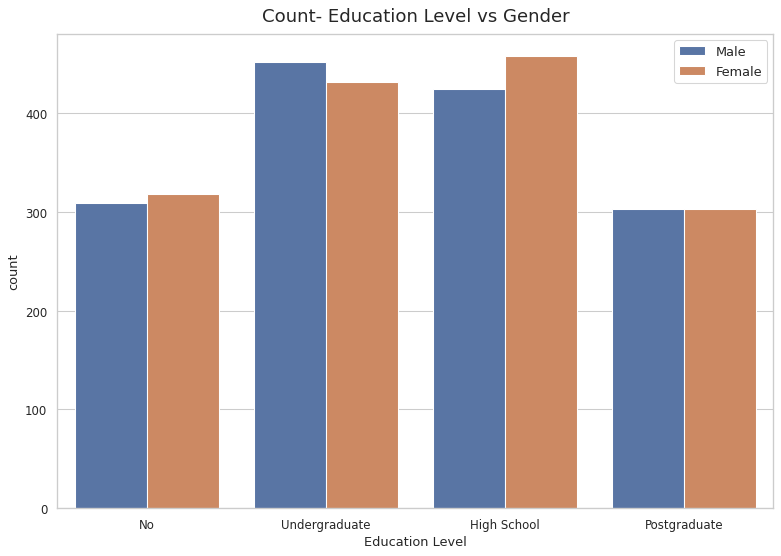

In [ ]:
plt.figure(figsize=(12,8), dpi=77)
sns.countplot(x=df['Education Level'],hue=df['Gender'])
plt.title("Count- Education Level vs Gender", size=17, pad=12)
plt.legend(['Male','Female'], loc='upper right', prop={'size': 12})

plt.show()

The count plot clearly signifies specially the educational attainment achieved by the male and female subjects. This proves that a larger number of male students complete their undergraduate degree than female students meaning that male students might have better chance or are more inclined in having higher education at this level.

On the other hand, female has a higher passing rate in high school than male and this indicates women could easily finish the secondary education. This has clearly shown that there is a change in the earlier disparities in the educational attainment since females are almost catching-up with males in earlier stages of education.

As for the last level which goes down to the doctoral, the data reveals that males and females have quite similar level of PhD holders, thus implying that once the male and female have entered the higher tier of education, their completion rates are quite similar.

Furthermore, the count plot shows that females with no formal education are higher in number than male with no formal education. This discovery is important because it brings into focus a cause for concern mapping to limit Democratic space that of some females may experience to access education.

All in all, the count plot that has been presented in the paper provides quite sophisticated trends in educational attainment by gender, as well as successes and inequalities. These findings may be useful in designing the educational policies and kindergartens’ programs and practices that can support the equality of genders and access to education for everyone.

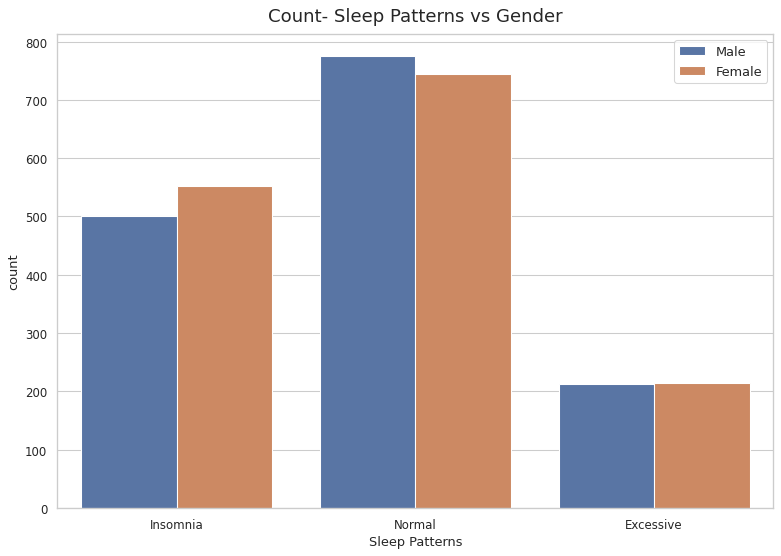

In [ ]:
plt.figure(figsize=(12,8), dpi=77)
sns.countplot(x=df['Sleep Patterns'],hue=df['Gender'])
plt.title("Count- Sleep Patterns vs Gender", size=17, pad=12)
plt.legend(['Male','Female'], loc='upper right', prop={'size': 12})

plt.show()

This is most easily visualized in the count plot which shows some very interesting differences in sleep habits between the sexes. This reveals that males prefer to have normal sleep pattern more frequently than females meaning that they might enjoying better quality and longer sleep.

On the other hand, females have a higher prevalence of isomnia which means that they have many difficulties to overcome in order to have a sound sleep. The reason for such a divergence might be found in fluctuations of sex hormones and stress levels, as well as in gender- specific workload in women.

Sleeping differences of the two groups bring light into essential aspects of mental as well as physical well-being. Although normal sleep is effective for male, greater prevalence of isomnia in females that leads to enhanced stress level and fatigue may impair their health and quality of life.

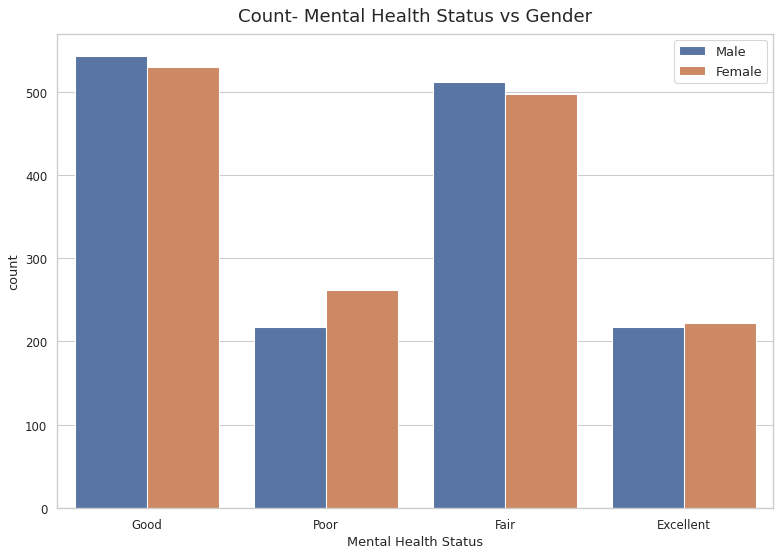

In [ ]:
plt.figure(figsize=(12,8), dpi=77)
sns.countplot(x=df['Mental Health Status'],hue=df['Gender'])
plt.title("Count- Mental Health Status vs Gender", size=17, pad=12)
plt.legend(['Male','Female'], loc='upper right', prop={'size': 12})

plt.show()


The count plot shows that a higher percentage of females report poorer mental health than males, thus highlighting the gender gap in mental health. This implies that women are more vulnerable to experience psychological disorders than men due to certain factors including, social, stress and some health conditions.

Thus, having discussed the quantitative distribution of males and females by the criteria of good, fair, and excellent mental health, it is possible to conclude that the observed differences are not significant. This means that whereas a greater percentage of females suffer with poor mental health, females in the better classifications: good, fair, and excellent; have comparable results as their counterparts in males.

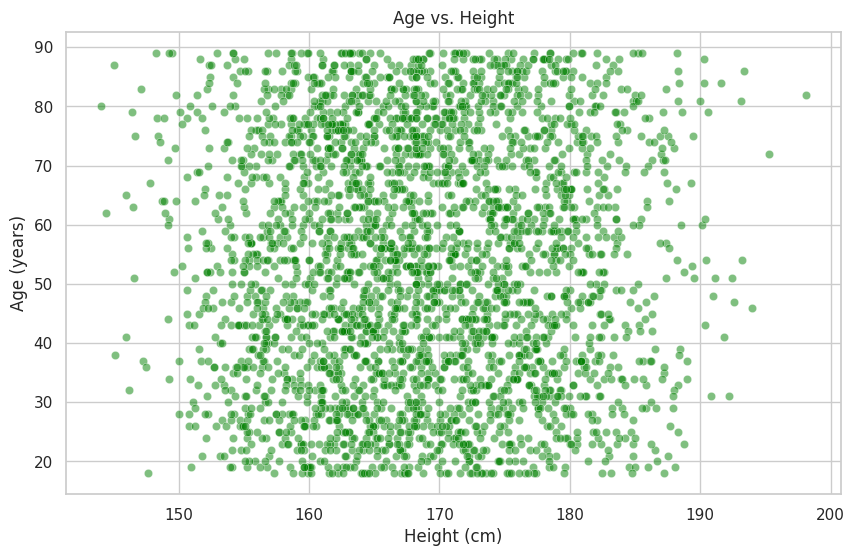

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Height (cm)', y='Age (years)', data=df, color='green', alpha=0.5)
plt.title('Age vs. Height')
plt.xlabel('Height (cm)')
plt.ylabel('Age (years)')
plt.grid(True)
plt.show()

From the scatter plot, we notice that majority of the people in the given age limit lie within the height range of 160cm – 175 cm. The heights associated with this cluster raise an argument that these heights are normal among the aged people in the given data set.

It will be important knowing this height distribution as a mean to analyze the relation between age and height besides enabling computation of general health status and demographic examinations. It also reflects possibly genetic, or an environmental or nutritional factor which determines heights in people of certain ages.

All in all, we can observe a reasonable degree of population density in regard to the specified height range and it is worthy of further research concerning physical well-being and longevity.

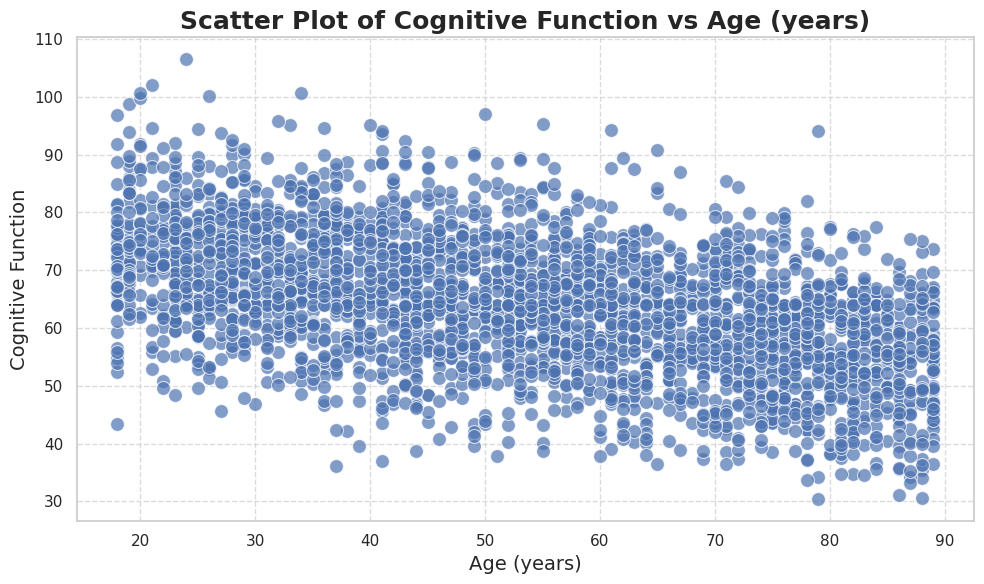

In [ ]:
# Set up the figure size and style
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")  # Use whitegrid style for better readability

# Create the scatter plot
sns.scatterplot(x='Age (years)', y='Cognitive Function', data=df, s=100, edgecolor='w', alpha=0.7)

#  title and labels
plt.title('Scatter Plot of Cognitive Function vs Age (years)', fontsize=18, fontweight='bold')
plt.xlabel('Age (years)', fontsize=14)
plt.ylabel('Cognitive Function', fontsize=14)

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()



The scatter plot suggests that individuals in their early 20s and 30s exhibit higher levels of creativity and intelligence, as well as enhanced cognitive function, compared to other age groups. This trend may be attributed to various factors, including the neurological development that peaks during these years, as well as increased exposure to new ideas and experiences.